In [1]:
dataset = "/content/drive/Othercomputers/My MacBook Air/NEU/Unsupervised/Final Project/online_retail_II.csv"

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from numpy import math

pd.set_option("display.max_columns", 50)

In [3]:
retail_df=pd.read_csv(dataset)
retail_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [4]:
# shape of dataset
retail_df.shape

(1067371, 8)

In [5]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Checking for Null values
retail_df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Observations:
- Datatype of InvoiceDate is object need to convert it into datatime.
- There are null values in CustomerID and Description.

Customer ID is our Identification feature and Description has Product description.

The RFM analysis and KMeans Clustering can not be done without Customer ID values.

Hence, droppingg the missing values

In [7]:
retail_df.dropna(subset=['Customer ID'],inplace=True)


In [8]:
retail_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
retail_df.describe()

Quantity          Price    Customer ID
count  824364.000000  824364.000000  824364.000000
mean       12.414574       3.676800   15324.638504
std       188.976099      70.241388    1697.464450
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13975.000000
50%         5.000000       1.950000   15255.000000
75%        12.000000       3.750000   16797.000000
max     80995.000000   38970.000000   18287.000000

We can see that Quantity and Price columns have negative values, lets explore these entries

In [10]:
retail_df[retail_df['Quantity']<0]

Invoice StockCode                       Description  Quantity  \
178      C489449     22087          PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                POTTING SHED TWINE        -6   
182      C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                               ...       ...   
1065910  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
1067002  C581499         M                            Manual        -1   
1067176  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
1067177  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
1067178  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                 InvoiceDate   Price  Customer ID         Country  
178      2009-12-01 10:33:00    2.95      16321.0       Australia  
179      2009-12-01 10:33:00    1.65      16321.0       Australia  
180      2009-12-01 10:33:00    4.25      16321.0       Australia  
181      2009-12-01 10:33:00    2.10      16321.0       Australia  
182      2009-12-01 10:33:00    2.95      16321.0       Australia  
...                      ...     ...          ...             ...  
1065910  2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
1067002  2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
1067176  2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
1067177  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
1067178  2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[18744 rows x 8 columns]

Invoice numbers start with C and as per description of data these are cancellations hence dropping these entries

In [11]:
# changing the datatype to str
retail_df['Invoice'] = retail_df['Invoice'].astype('str')

In [12]:
retail_df=retail_df[~retail_df['Invoice'].str.contains('C')]

In [13]:
retail_df[retail_df['Price']<=0].sort_values('Price')

Invoice StockCode                          Description  Quantity  \
4674     489825     22076                   6 RIBBONS EMPIRE          12   
840208   564651     22955             36 FOIL STAR CAKE CASES        144   
840207   564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
840206   564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
823515   562973     23157           SET OF 6 NATIVITY MAGNETS        240   
...         ...       ...                                  ...       ...   
327801   521375     22202              MILK PAN PINK RETROSPOT         3   
296375   518231     22472            TV DINNER TRAY DOLLY GIRL         9   
276858   516304     22690        DOORMAT HOME SWEET HOME BLUE          6   
400047   527696     22121           NOEL WOODEN BLOCK LETTERS          1   
1027583  578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

                 InvoiceDate  Price  Customer ID         Country  
4674     2009-12-02 13:34:00    0.0      16126.0  United Kingdom  
840208   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
840207   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
840206   2011-08-26 14:19:00    0.0      14646.0     Netherlands  
823515   2011-08-11 11:42:00    0.0      14911.0            EIRE  
...                      ...    ...          ...             ...  
327801   2010-09-05 11:58:00    0.0      12647.0         Germany  
296375   2010-08-05 15:28:00    0.0      12471.0         Germany  
276858   2010-07-19 13:13:00    0.0      14025.0  United Kingdom  
400047   2010-10-18 15:13:00    0.0      13554.0  United Kingdom  
1027583  2011-11-25 15:57:00    0.0      13256.0  United Kingdom  

[71 rows x 8 columns]

We observe that these are not product purchase transactions but transactions of store related to some debt hence also deopping these entries

In [14]:
# taking price values greater than 0.
retail_df=retail_df[retail_df['Price']>0]
retail_df.head()


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [15]:
retail_df.shape


(805549, 8)

Our data got reduced now we have 1041671 datapoints

In [16]:
retail_df.describe()

Quantity          Price    Customer ID
count  805549.000000  805549.000000  805549.000000
mean       13.290522       3.206561   15331.954970
std       143.634088      29.199173    1696.737039
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13982.000000
50%         5.000000       1.950000   15271.000000
75%        12.000000       3.750000   16805.000000
max     80995.000000   10953.500000   18287.000000

## Feature Engineering:

In [17]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26:33.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")


In [18]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)
retail_df["second"] = retail_df["InvoiceDate"].apply(lambda x: x.second)

In [19]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [20]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

Making total amount column by multiplying quantity with price

In [21]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['Price']

In [22]:
retail_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount  
0        1     7      45       0  December  Tuesday         83.4  
1        1     7      45       0  December  Tuesday         81.0  
2        1     7      45       0  December  Tuesday         81.0  
3        1     7      45       0  December  Tuesday        100.8  
4        1     7      45       0  December  Tuesday         30.0

## EDA:

In [23]:
retail_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'second', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

### TOP 10 HIGHEST SELLING PRODUCTS SOLD BY THE STORE

In [24]:
df1=retail_df.groupby('Description').agg({'Quantity': 'sum'}) # Only sum the 'Quantity' column
df1.sort_values(['Quantity'], ascending=False,inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'Description':'Product_name'},inplace=True)
df2=df1[['Product_name','Quantity']][:10]
df2

Product_name  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS    109169
1  WHITE HANGING HEART T-LIGHT HOLDER     93640
2         PAPER CRAFT , LITTLE BIRDIE     80995
3       ASSORTED COLOUR BIRD ORNAMENT     79913
4      MEDIUM CERAMIC TOP STORAGE JAR     77916
5             JUMBO BAG RED RETROSPOT     75759
6                 BROCADE RING PURSE      71129
7  PACK OF 60 PINK PAISLEY CAKE CASES     55270
8         60 TEATIME FAIRY CAKE CASES     53495
9     PACK OF 72 RETROSPOT CAKE CASES     46107

Text(0.5, 1.0, 'Top 10 products by quantity')

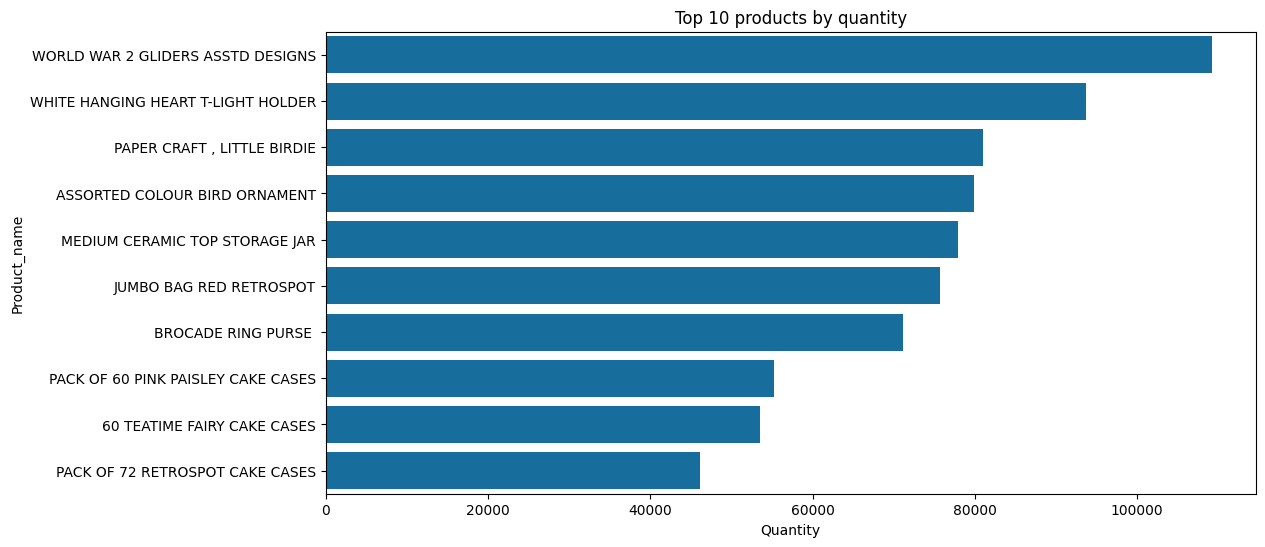

In [25]:
# top 10 products by quantity
sns.set_palette('colorblind')
plt.figure(figsize=(12,6))
sns.barplot(x=df2['Quantity'],y=df2['Product_name'])
plt.title('Top 10 products by quantity')

Observations:
- WORLD WAR 2 GLIDERS ASSTD DESIGNS was the highest selling product
- WHITE HANGING HEART T-LIGHT HOLDER was the second highest selling product



### 10 LEAST SELLING PRODUCTS OF THE STORE

In [26]:
df3=df1[['Product_name','Quantity']].tail(10)
df3

Product_name  Quantity
5273   WHITE SCANDINAVIAN HEART CHRISTMAS         1
5274    ENGLISH ROSE TEA FOR ONE GIFT BOX         1
5275                   OWLS CHARLOTTE BAG         1
5276    F FAIRY POTPOURRI CUSHIONS SUMMER         1
5277     F.FAIRY S/3 SML CANDLE, LAVENDER         1
5278         F.FAIRY S/3 SML CANDLE, ROSE         1
5279   F.FAIRY S/3 SML CANDLE,LILY/VALLEY         1
5280      VINTAGE METAL CAKE STAND CREAM          1
5281  F.FAIRY,CANDLE IN GLASS,LILY/VALLEY         1
5282        RUSSIAN FOLKART STACKING TINS         1

These are the least selling products of the store with only 1 unit sold of each product

### TOP 10 STOCKCODES BY QUANTITY

In [27]:
df4=retail_df.groupby('StockCode').agg({'Quantity': 'sum'}) # Only sum the 'Quantity' column
df4.sort_values(['Quantity'], ascending=False,inplace=True)
df4.reset_index(inplace=True)
df5=df4[['StockCode','Quantity']][:10]
df5

StockCode  Quantity
0     84077    109169
1    85099B     94983
2    85123A     93697
3     21212     91263
4     23843     80995
5     84879     79913
6     22197     77971
7     23166     77916
8     17003     71129
9     21977     55270

Text(0.5, 1.0, 'Top 10 StockCodes by quantity')

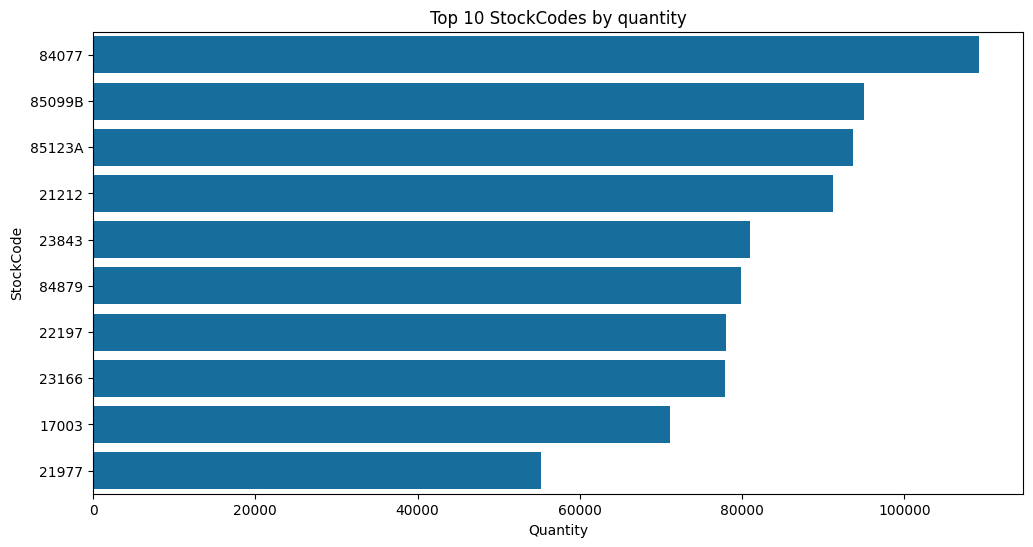

In [28]:
# top 10 StockCodes by quantity
plt.figure(figsize=(12,6))
sns.set_palette('colorblind')
sns.barplot(x=df5['Quantity'],y=df5['StockCode'])
plt.title('Top 10 StockCodes by quantity')

### TOP 10 HIGHEST SPENDING CUSTOMERS

In [29]:
Top10Spending=retail_df.groupby('Customer ID')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False).head(10)
Top10Spending

Customer ID  TotalAmount
5692      18102.0    608821.65
2277      14646.0    528602.52
1789      14156.0    313946.37
2538      14911.0    295972.63
5050      17450.0    246973.09
1331      13694.0    196482.81
5109      17511.0    175603.55
4061      16446.0    168472.50
4295      16684.0    147142.77
68        12415.0    144458.37

Text(0.5, 1.0, 'Top 10 Spending Customers.')

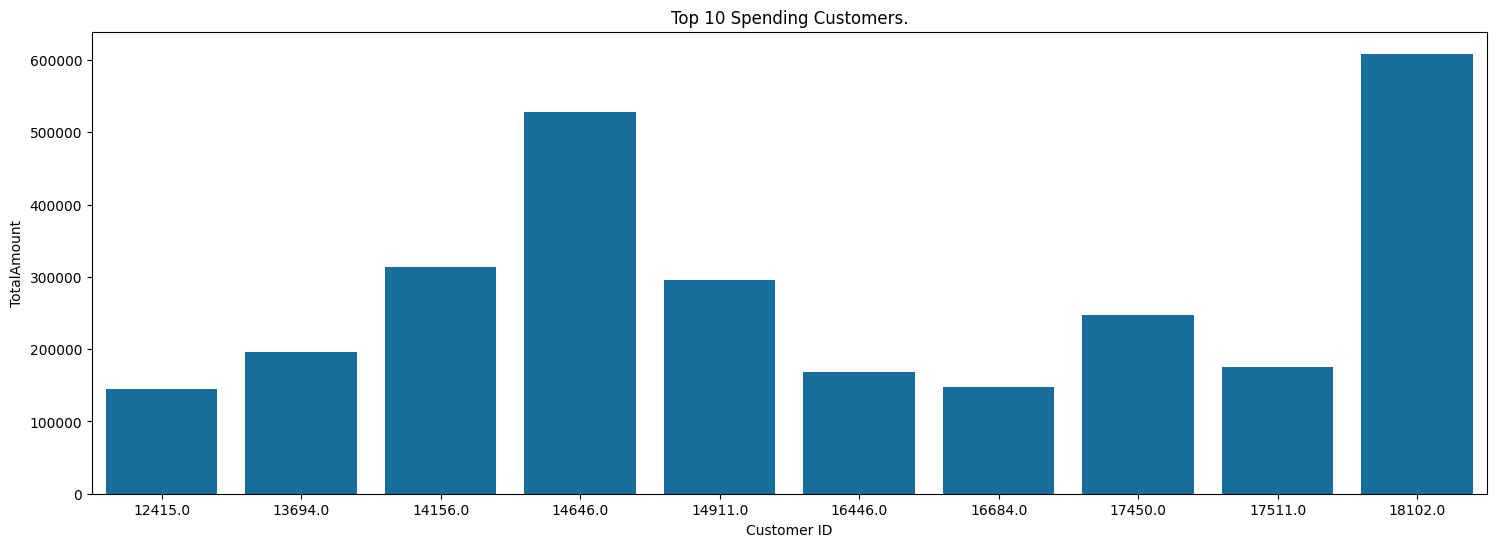

In [30]:
# Top 10 Spending Customers
plt.figure(figsize=(18,6))
sns.barplot(x=Top10Spending['Customer ID'],y=Top10Spending['TotalAmount'].head(10))
plt.title('Top 10 Spending Customers.')

In [31]:
# Convert Customer ID and TotalAmount to integers
Top10Spending['Customer ID'] = Top10Spending['Customer ID'].astype(int)
Top10Spending['TotalAmount'] = Top10Spending['TotalAmount'].astype(int)

In [32]:
Top10Spending

Customer ID  TotalAmount
5692        18102       608821
2277        14646       528602
1789        14156       313946
2538        14911       295972
5050        17450       246973
1331        13694       196482
5109        17511       175603
4061        16446       168472
4295        16684       147142
68          12415       144458

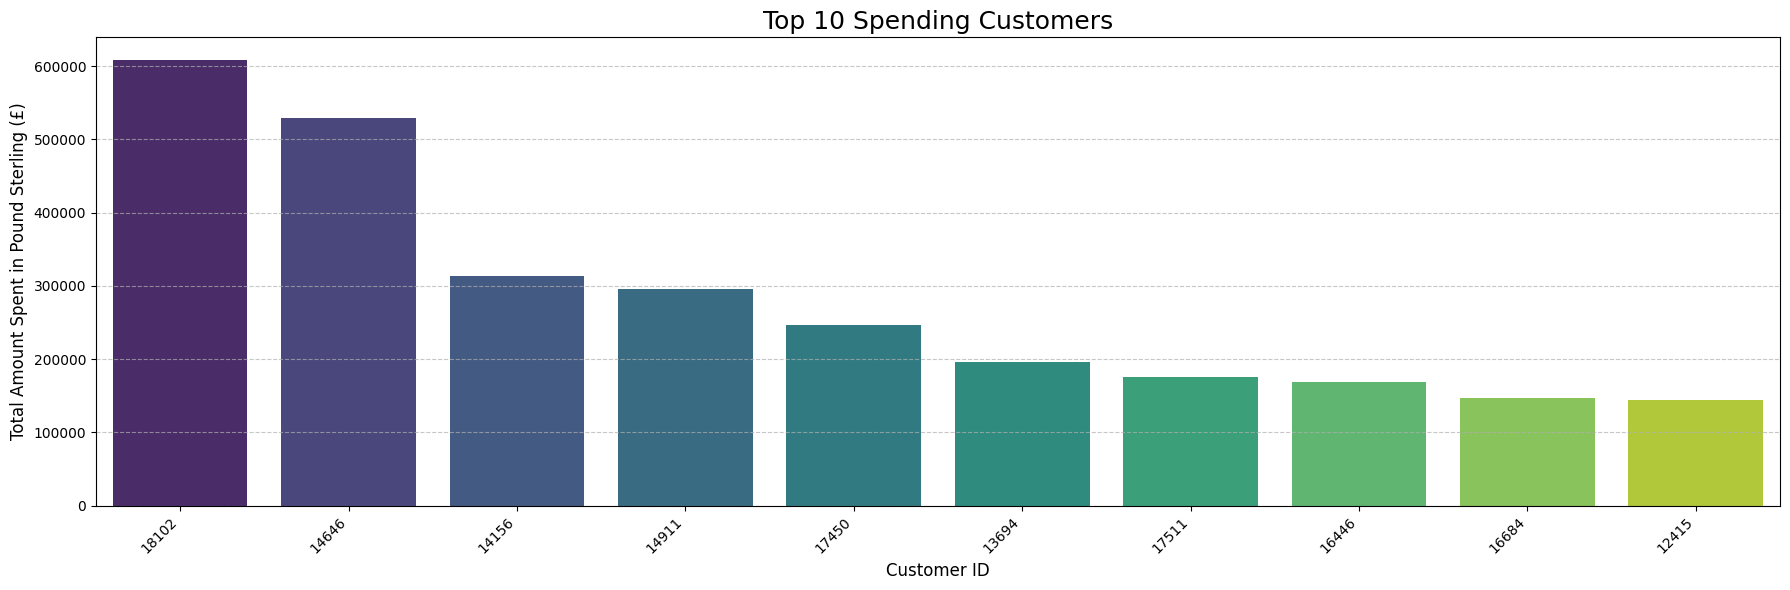

In [33]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Customer ID', y='TotalAmount', data=Top10Spending, palette='viridis',order=Top10Spending['Customer ID'])
plt.title('Top 10 Spending Customers', fontsize=18)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Amount Spent in Pound Sterling (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid
plt.tight_layout()
plt.show()

### TOP 10 MOST FREQUENT CUSTOMERS

In [34]:
Top10Frequent=retail_df['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID','Customer ID':'Frequency'}).head(10)
Top10Frequent

Frequency  count
0    17841.0  12890
1    14911.0  11245
2    12748.0   7228
3    14606.0   6566
4    14096.0   5111
5    15311.0   4434
6    14156.0   4048
7    14646.0   3849
8    13089.0   3362
9    16549.0   3250

We observe that both lists have 3 Customer IDs common imptlying most frequent customers tend to be the most spending customers

### TOP 10 CUSTOMERS BY AVERAGE ORDER AMOUNT

In [35]:
avg_amount=retail_df.groupby('Customer ID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False).head(10)

In [36]:
avg_amount

Customer ID  Avg_amount_per_customer
4061      16446.0             56157.500000
2722      15098.0             13305.500000
569       12918.0             10953.500000
3382      15760.0              6958.170000
3371      15749.0              4453.430000
2819      15195.0              3861.000000
854       13205.0              2803.200000
0         12346.0              2281.072353
5438      17846.0              2033.100000
2826      15202.0              2000.496667

Text(0.5, 1.0, 'Average amount spent by each Customer')

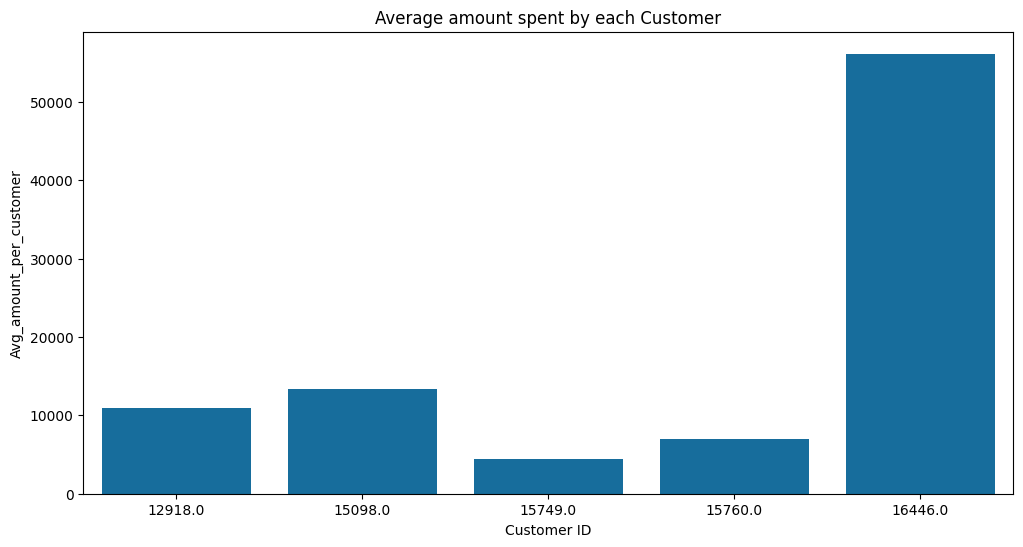

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['Customer ID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

### TOP COUNTRIES CONTRIBUTING HIGHEST REVENUE TO THE STORE

In [38]:
TopCountries=retail_df.groupby('Country')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
TopCountries

Country   TotalAmount
38        United Kingdom  1.472315e+07
10                  EIRE  6.216311e+05
24           Netherlands  5.542323e+05
14               Germany  4.312625e+05
13                France  3.552575e+05
0              Australia  1.699681e+05
32                 Spain  1.091785e+05
34           Switzerland  1.003653e+05
33                Sweden  9.154972e+04
9                Denmark  6.986219e+04
3                Belgium  6.575342e+04
26                Norway  6.010962e+04
28              Portugal  5.728530e+04
19                 Japan  4.713839e+04
6        Channel Islands  4.499676e+04
18                 Italy  3.255042e+04
12               Finland  2.992554e+04
31             Singapore  2.531706e+04
7                 Cyprus  2.498013e+04
1                Austria  2.361301e+04
15                Greece  1.909619e+04
27                Poland  1.090245e+04
17                Israel  1.042109e+04
37  United Arab Emirates  9.202690e+03
39           Unspecified  8.613650e+03
36                   USA  8.366860e+03
23                 Malta  8.099090e+03
22             Lithuania  6.553740e+03
16               Iceland  5.633320e+03
5                 Canada  4.883040e+03
35              Thailand  3.070540e+03
29                   RSA  1.933740e+03
21               Lebanon  1.693880e+03
4                 Brazil  1.411870e+03
2                Bahrain  1.354370e+03
11    European Community  1.300250e+03
20                 Korea  1.118510e+03
8         Czech Republic  8.267400e+02
40           West Indies  5.364100e+02
30          Saudi Arabia  1.459200e+02
25               Nigeria  1.403900e+02

Text(0.5, 1.0, 'Top 5 Countries based on highest store revenue contributions')

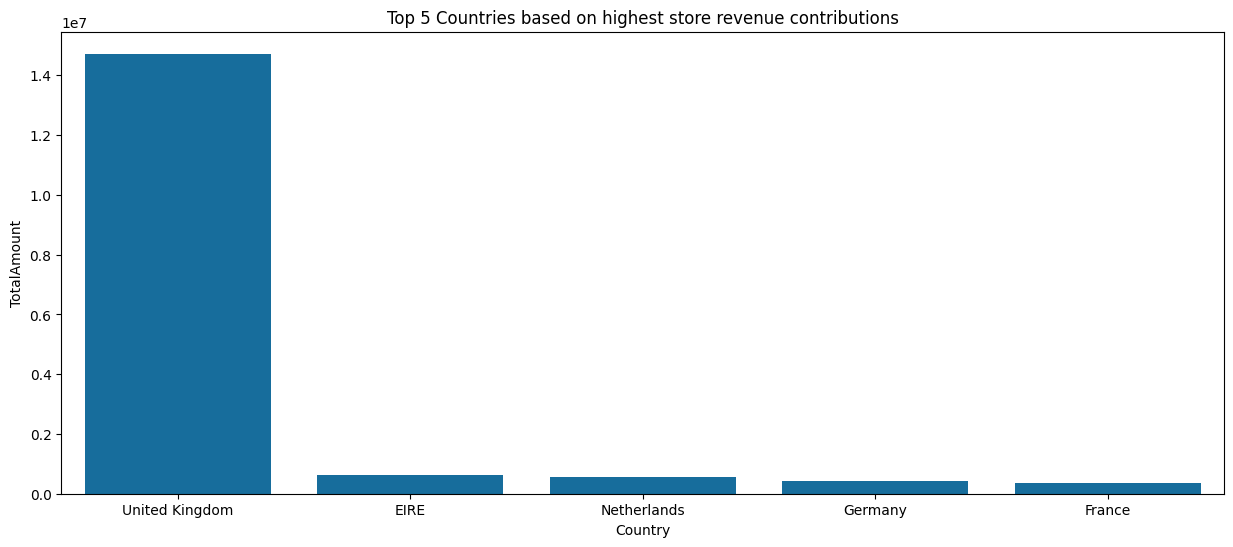

In [39]:
# top 5 countries where maximum sale happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].head(5),y=TopCountries['TotalAmount'].head(5))
plt.title('Top 5 Countries based on highest store revenue contributions')

UK contributes most revenue to the store

European countries like Germany, France, Netherlands, EIRE contribute significant revenue to the store

Text(0.5, 1.0, 'Top 5 Countries based on last store revenue contributors ')

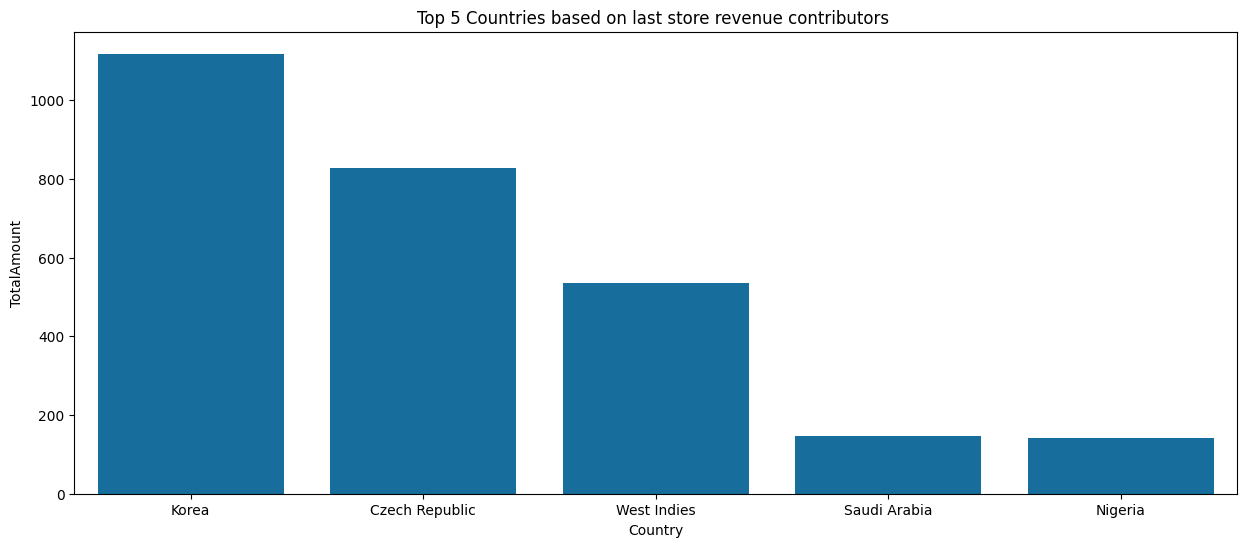

In [40]:
# top 5 countries where least sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=TopCountries['Country'].tail(5),y=TopCountries['TotalAmount'].tail(5))
plt.title('Top 5 Countries based on last store revenue contributors ')

### Countries contributing least to the store revenue are non european countries

In [41]:
SalesbyMonth=retail_df.groupby('Month')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
SalesbyMonth

Month  TotalAmount
9    November  2334153.422
2    December  2089456.840
10    October  2075998.790
11  September  1784453.383
6        June  1300280.270
7       March  1295109.751
8         May  1278580.350
1      August  1249586.550
5        July  1191727.751
4     January  1126764.102
0       April  1063809.553
3    February   953508.416

Text(0.5, 1.0, 'Sales in different Months ')

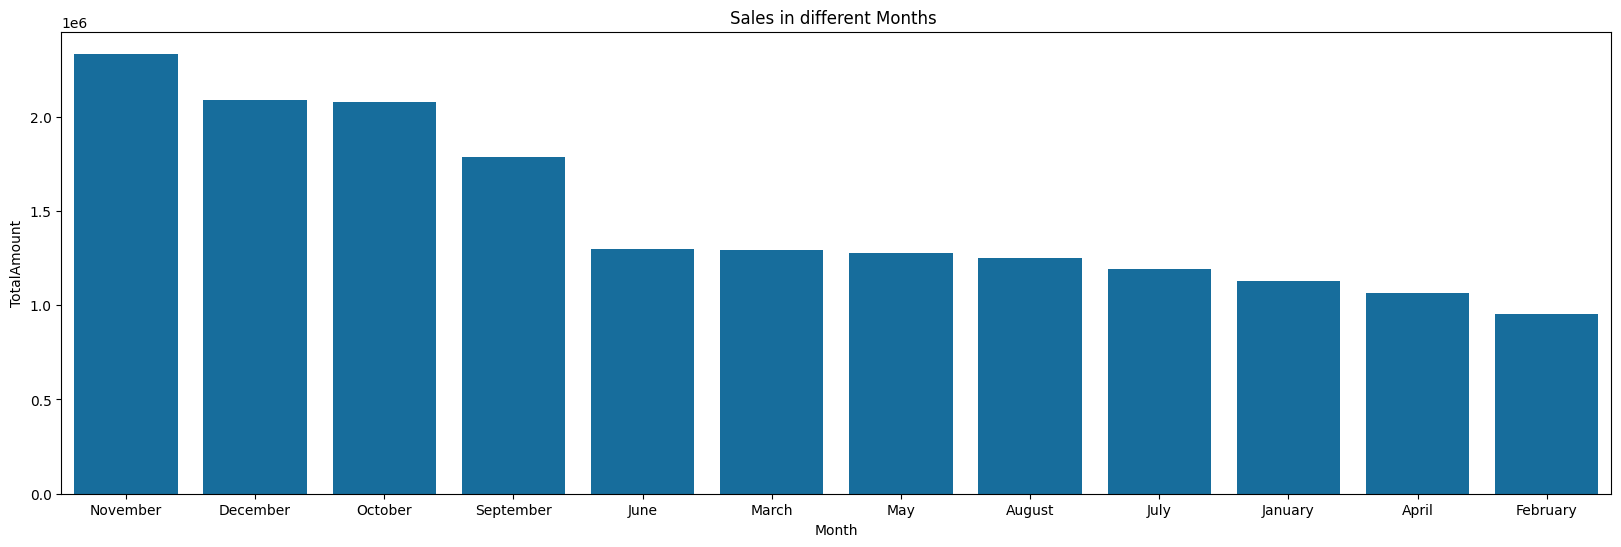

In [42]:
# Sales different months.
plt.figure(figsize=(20,6))
sns.barplot(x=SalesbyMonth['Month'],y=SalesbyMonth['TotalAmount'])
plt.title('Sales in different Months ')

Highest sales happened in the month of November (Eve of Holiday Season) while least sale happened in the month of February

In [43]:
sales_on_day_basis=retail_df.groupby('Day')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_on_day_basis

Day  TotalAmount
4   Thursday  3841082.962
5    Tuesday  3384678.832
6  Wednesday  3115619.693
1     Monday  2817407.806
0     Friday  2758423.493
3     Sunday  1816413.342
2   Saturday     9803.050

Text(0.5, 1.0, 'Sales on different Days ')

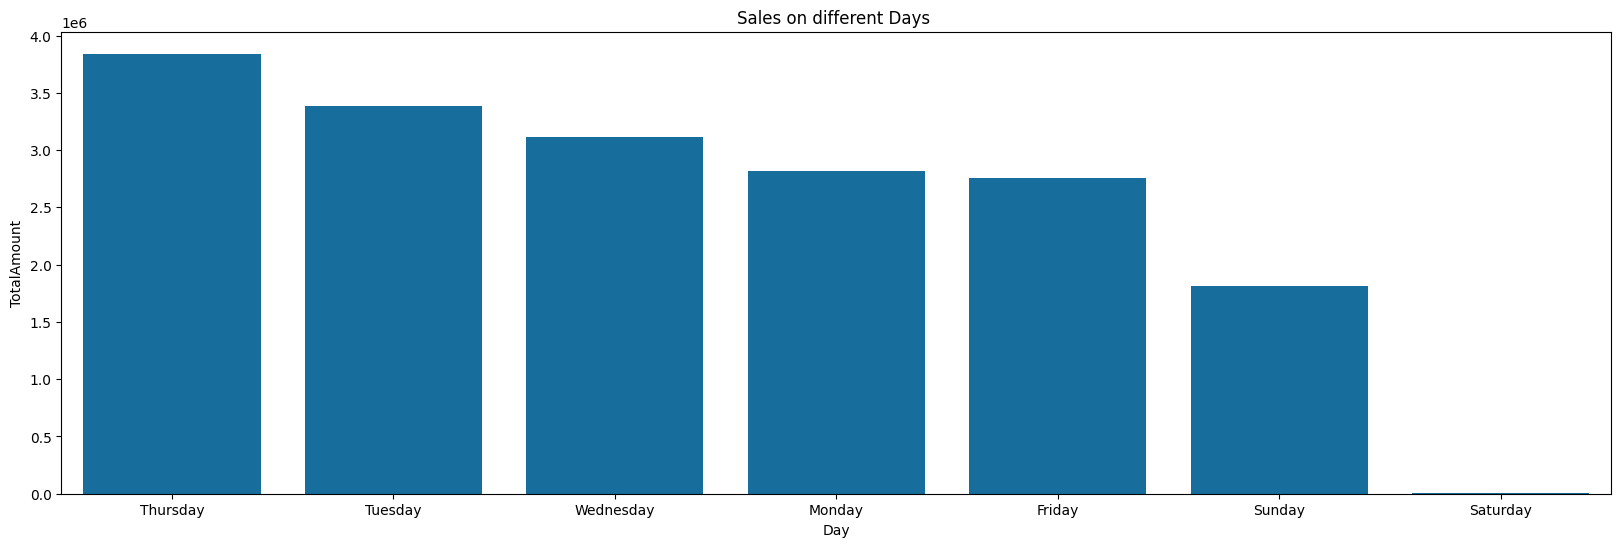

In [44]:
# Sales on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['TotalAmount'])
plt.title('Sales on different Days ')

Sale on Thursdays is very high

Sale on Saturdays is very low

In [45]:
salescount_on_day_basis = retail_df['Day'].value_counts().reset_index().rename(columns={'index': 'Day', 'Day': 'Sale_count'})
salescount_on_day_basis.columns = ['Day', 'Sale_count']
salescount_on_day_basis

Day  Sale_count
0   Thursday      161664
1    Tuesday      136794
2  Wednesday      136501
3     Sunday      136329
4     Monday      128359
5     Friday      105502
6   Saturday         400

Text(0.5, 1.0, 'Sales count on different Days ')

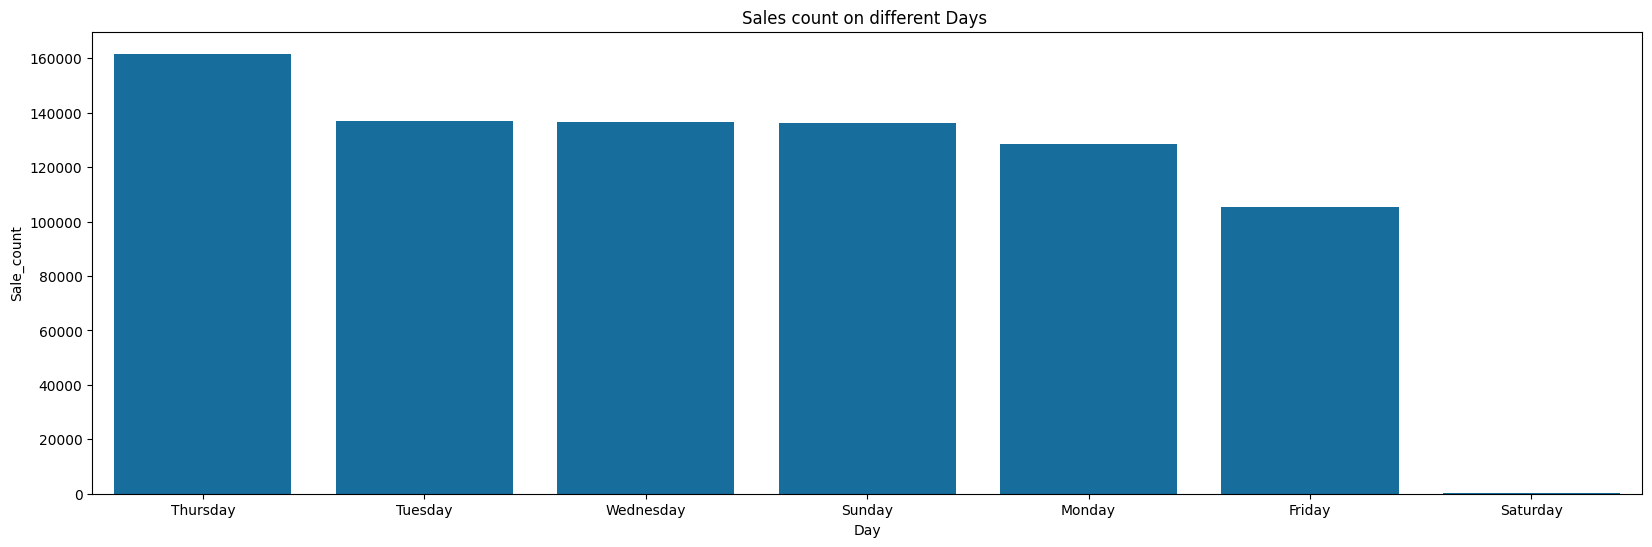

In [46]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=salescount_on_day_basis['Day'],y=salescount_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

As the sales revenue and sales count is negligible on Saturdays probably the store is closed on Saturday and the few orders have been given on phone

### SALES IN DIFFERENT DAY TIMINGS

In [47]:
retail_df['hour'].unique()


array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20,  6])

In [48]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [49]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [50]:
sales_timing=retail_df.groupby('Day_time_type')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
sales_timing

Day_time_type   TotalAmount
0     Afternoon  1.063495e+07
2       Morning  6.747350e+06
1       Evening  3.611272e+05

Text(0.5, 1.0, 'Sales count in different day timings')

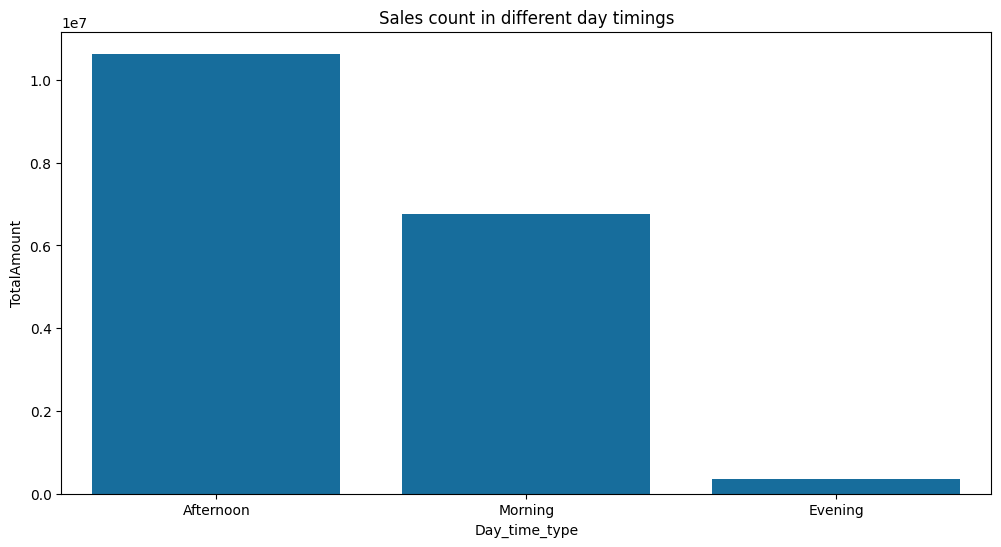

In [51]:
#Sales on different day-time types
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['TotalAmount'])
plt.title('Sales count in different day timings')

In [52]:
# create Revenue Column
df = retail_df.copy()
df['Revenue'] = retail_df['Quantity'] * retail_df['Price']
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount  \
0        1     7      45       0  December  Tuesday         83.4   
1        1     7      45       0  December  Tuesday         81.0   
2        1     7      45       0  December  Tuesday         81.0   
3        1     7      45       0  December  Tuesday        100.8   
4        1     7      45       0  December  Tuesday         30.0   

  Day_time_type  Revenue  
0       Morning     83.4  
1       Morning     81.0  
2       Morning     81.0  
3       Morning    100.8  
4       Morning     30.0

### Revenue per month and year

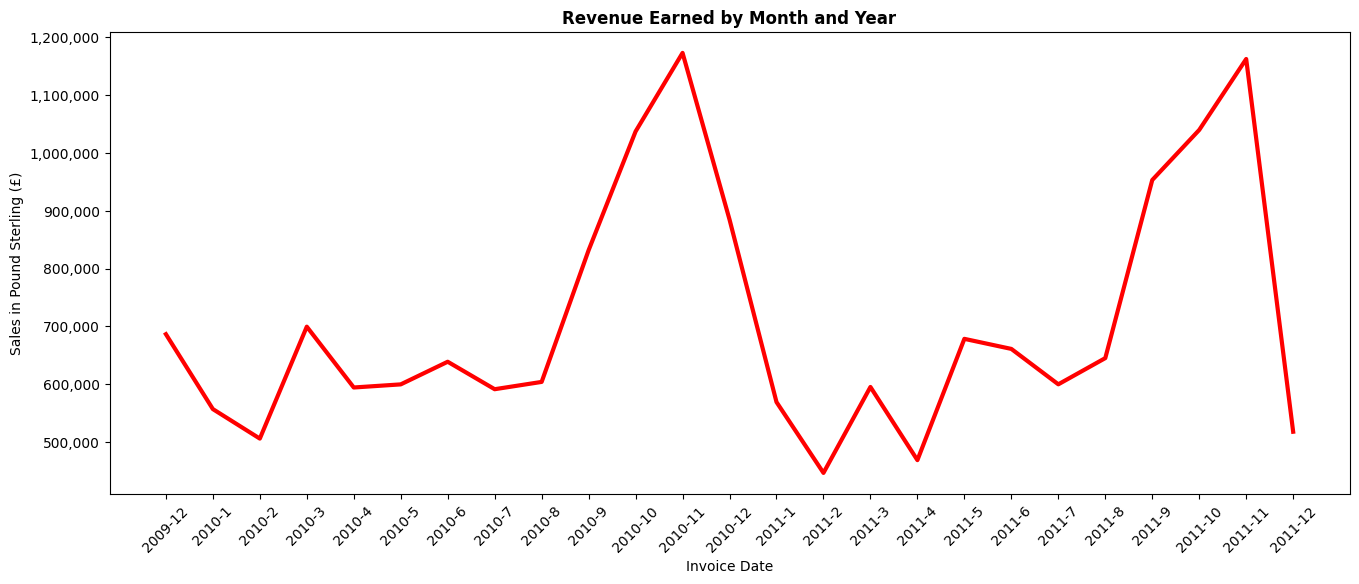

In [53]:
import matplotlib.ticker as ticker
# Revenue per month and year
monthly_revenue = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(16,6), color='r', linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Sales in Pound Sterling (£)')
plt.title('Revenue Earned by Month and Year', fontweight='bold')

# Show the plot
plt.show()

## Frequent Itemset & Association Rule Mining:

In [54]:
df_freq=retail_df.copy()

In [55]:
df_freq.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount Day_time_type  
0        1     7      45       0  December  Tuesday         83.4       Morning  
1        1     7      45       0  December  Tuesday         81.0       Morning  
2        1     7      45       0  December  Tuesday         81.0       Morning  
3        1     7      45       0  December  Tuesday        100.8       Morning  
4        1     7      45       0  December  Tuesday         30.0       Morning

In [56]:
df_freq['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [57]:
# Count rows by country
country_counts = df_freq.groupby('Country')['Invoice'].count()
print("Number of rows per country:")
print(country_counts)

Number of rows per country:
Country
Australia                 1812
Austria                    922
Bahrain                     59
Belgium                   3068
Brazil                      94
Canada                     228
Channel Islands           1569
Cyprus                    1155
Czech Republic              25
Denmark                    798
EIRE                     15743
European Community          60
Finland                   1032
France                   13812
Germany                  16694
Greece                     657
Iceland                    253
Israel                     322
Italy                     1468
Japan                      485
Korea                       53
Lebanon                     45
Lithuania                  189
Malta                      282
Netherlands               5088
Nigeria                     30
Norway                    1436
Poland                     512
Portugal                  2446
RSA                        122
Saudi Arabia                 9
Sin

### Invoice x Product Matrix:

In [58]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

In [59]:
# I am choosing Germany from the data set.
df_with_one_country = df_freq[df_freq["Country"] == "Germany"]
df_with_one_country.head()

Invoice StockCode                      Description  Quantity  \
579  489526    85049E        SCANDINAVIAN REDS RIBBONS        12   
580  489526     21976   PACK OF 60 MUSHROOM CAKE CASES        24   
581  489526     21498                 RED SPOTS  WRAP         25   
582  489526     22077           6 RIBBONS RUSTIC CHARM        12   
583  489526     84946  ANTIQUE SILVER TEA GLASS ETCHED        12   

            InvoiceDate  Price  Customer ID  Country  year  month_num  \
579 2009-12-01 11:50:00   1.25      12533.0  Germany  2009         12   
580 2009-12-01 11:50:00   0.55      12533.0  Germany  2009         12   
581 2009-12-01 11:50:00   0.42      12533.0  Germany  2009         12   
582 2009-12-01 11:50:00   1.65      12533.0  Germany  2009         12   
583 2009-12-01 11:50:00   1.25      12533.0  Germany  2009         12   

     day_num  hour  minute  second     Month      Day  TotalAmount  \
579        1    11      50       0  December  Tuesday         15.0   
580        1    11      50       0  December  Tuesday         13.2   
581        1    11      50       0  December  Tuesday         10.5   
582        1    11      50       0  December  Tuesday         19.8   
583        1    11      50       0  December  Tuesday         15.0   

    Day_time_type  
579       Morning  
580       Morning  
581       Morning  
582       Morning  
583       Morning

In [60]:
# Construct an Invoice-Product Matrix with "Invoice" as rows and "StockCode" as columns
# The "Quantity" is placed at the intersection of these two variables
# The transactions are functionalized by assigning 1 to products with an invoice number and 0 to those without

def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

This function creates an Invoice-Product Matrix from a given dataframe. It groups the data by 'Invoice' and either 'StockCode' or 'Description', depending on the 'id' parameter. The matrix is then filled with 1s where a product appears in an invoice and 0s where it doesn't, effectively creating a binary representation of product presence in each invoice.

In [61]:
inv_pro_df = create_invoice_product_df(df_with_one_country, id=True)
inv_pro_df.head()

StockCode  10002  10125  10135  11001  15034  15036  15039  15044A  15044B  \
Invoice                                                                      
489526         0      0      0      0      0      0      0       0       0   
490395         0      0      0      0      0      0      0       0       0   
490563         0      0      0      0      0      0      0       0       0   
490564         0      0      0      0      0      0      0       0       0   
490682         0      0      0      0      0      0      0       0       0   

StockCode  15044D  15056BL  15056N  15056P  15058A  15058B  15058C  15060B  \
Invoice                                                                      
489526          0        1       1       0       0       0       0       0   
490395          0        0       0       0       0       0       0       0   
490563          0        0       0       0       0       0       0       0   
490564          0        0       0       0       0       0       0       0   
490682          0        1       1       0       0       0       0       0   

StockCode  16008  16011  16012  16014  16016  16033  16045  16052  ...  90070  \
Invoice                                                            ...          
489526         0      0      0      0      0      0      0      0  ...      0   
490395         0      0      0      0      0      0      0      0  ...      0   
490563         0      0      0      0      0      0      0      0  ...      0   
490564         0      0      0      0      0      0      0      0  ...      0   
490682         0      0      0      0      0      0      0      0  ...      0   

StockCode  90087  90098  90104  90160A  90160B  90160C  90160D  90161B  \
Invoice                                                                  
489526         0      0      0       0       0       0       0       0   
490395         0      0      0       0       0       0       0       0   
490563         0      0      0       0       0       0       0       0   
490564         0      0      0       0       0       0       0       0   
490682         0      0      0       0       0       0       0       0   

StockCode  90161C  90161D  90167  90170  90173  90200E  90201A  90201B  \
Invoice                                                                  
489526          0       0      0      0      0       0       0       0   
490395          0       0      0      0      0       0       0       0   
490563          0       0      0      0      0       0       0       0   
490564          0       0      0      0      0       0       0       0   
490682          0       0      0      0      0       0       0       0   

StockCode  90201C  90201D  90202D  90204  ADJUST  M  PADS  POST  
Invoice                                                          
489526          0       0       0      0       0  0     0     1  
490395          0       0       0      0       0  0     0     1  
490563          0       0       0      0       0  0     0     0  
490564          0       0       0      0       0  0     0     1  
490682          0       0       0      0       0  0     0     1  

[5 rows x 2172 columns]

In [62]:
# if we want to access the names of the products whose StockCode we know.

def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

l = ["21987", "23235", "22747"]
[check_id(df_with_one_country, product_id) for product_id in l]

['PACK OF 6 SKULL PAPER CUPS']
['STORAGE TIN VINTAGE LEAF']
["POPPY'S PLAYHOUSE BATHROOM"]


[None, None, None]

### Association Rules:

In [63]:
# Possibilities of all possible product combinations
frequent_itemsets = apriori(inv_pro_df, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending=False).head(20)

support              itemsets
562   0.798479                (POST)
251   0.263625               (22326)
2602  0.242079         (POST, 22326)
253   0.172370               (22328)
27    0.166033               (20719)
2657  0.163498         (22328, POST)
943   0.149556         (20719, POST)
2505  0.138150        (22328, 22326)
317   0.135615               (22554)
142   0.133080               (21731)
5915  0.129278  (22328, POST, 22326)
284   0.119138               (22423)
319   0.117871               (22556)
2901  0.115336         (POST, 22554)
2144  0.114068         (21731, POST)
194   0.106464               (22077)
78    0.106464               (21238)
71    0.102662               (21212)
2926  0.101394         (22556, POST)
2798  0.100127         (POST, 22423)

In [64]:
# Enforcement of Association Rules:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01, num_itemsets=len(frequent_itemsets))
rules.sort_values("lift", ascending=False).head(30)

antecedents  \
57514                      (84997D, 20677)   
76582                      (84997D, 21239)   
76567               (84997D, 21240, 20677)   
76579                      (84997D, 20677)   
4736                               (22563)   
63365                (21245, 20675, 20676)   
57503                (84997C, POST, 21239)   
63348                (21244, 21242, 20674)   
77651                (21244, 21242, 20674)   
4737                               (22562)   
77646         (21245, 20675, 20676, 21238)   
76543         (21240, 84997C, POST, 20677)   
77622         (21244, 21242, 20674, 21238)   
76546         (21240, 84997C, POST, 21239)   
77675                (21245, 20675, 20676)   
76558                (84997C, POST, 21239)   
77662                (21244, 20674, 21238)   
57507                (84997D, POST, 20677)   
77654                (21244, 21245, 20676)   
77615         (21244, 21242, 20676, 20674)   
63396         (21244, 21242, 20674, 21238)   
63409                (21244, 21242, 20674)   
56577               (84997D, 21238, 20677)   
77597  (21244, 21242, 20676, 20674, 21238)   
46699                (21244, 21242, 20674)   
63234                (21245, 20675, 20676)   
77626         (21244, 21245, 20676, 21238)   
30322                      (84997C, 21239)   
30319                      (84997D, 20677)   
77700                       (21245, 20675)   

                               consequents  antecedent support  \
57514                (84997C, POST, 21239)            0.011407   
76582         (21240, 84997C, POST, 20677)            0.011407   
76567                (84997C, POST, 21239)            0.011407   
76579         (21240, 84997C, POST, 21239)            0.011407   
4736                               (22562)            0.011407   
63365                (21244, 21242, 20674)            0.011407   
57503                      (84997D, 20677)            0.010139   
63348                (21245, 20675, 20676)            0.011407   
77651         (21245, 20675, 20676, 21238)            0.011407   
4737                               (22563)            0.010139   
77646                (21244, 21242, 20674)            0.011407   
76543                      (84997D, 21239)            0.010139   
77622                (21245, 20675, 20676)            0.011407   
76546                      (84997D, 20677)            0.010139   
77675         (21244, 21242, 20674, 21238)            0.011407   
76558               (84997D, 21240, 20677)            0.010139   
77662         (21245, 21242, 20675, 20676)            0.012674   
57507                      (84997C, 21239)            0.010139   
77654         (20674, 21242, 20675, 21238)            0.012674   
77615                (21245, 20675, 21238)            0.011407   
63396                       (21245, 20675)            0.011407   
63409                (21245, 20675, 21238)            0.011407   
56577                      (84997C, 21239)            0.010139   
77597                       (21245, 20675)            0.011407   
46699                       (21245, 20675)            0.011407   
63234                (21244, 20674, 21238)            0.011407   
77626                (20674, 21242, 20675)            0.012674   
30322                      (84997D, 20677)            0.012674   
30319                      (84997C, 21239)            0.011407   
77700  (21244, 21242, 20676, 20674, 21238)            0.012674   

       consequent support   support  confidence       lift  representativity  \
57514            0.010139  0.010139    0.888889  87.666667               1.0   
76582            0.010139  0.010139    0.888889  87.666667               1.0   
76567            0.010139  0.010139    0.888889  87.666667               1.0   
76579            0.010139  0.010139    0.888889  87.666667               1.0   
4736             0.010139  0.010139    0.888889  87.666667               1.0   
63365            0.011407  0.011407    1.000000  87.666667               1.0 

In [65]:
# Product recommendation for users in the cart to be done
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []

    for i, product in sorted_rules["antecedents"].items():
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

    recommendation_list = list({item for item_list in recommendation_list for item in item_list})

    return recommendation_list[:rec_count]

In [66]:
# The name of the product
check_id(df_with_one_country, "21987")

['PACK OF 6 SKULL PAPER CUPS']


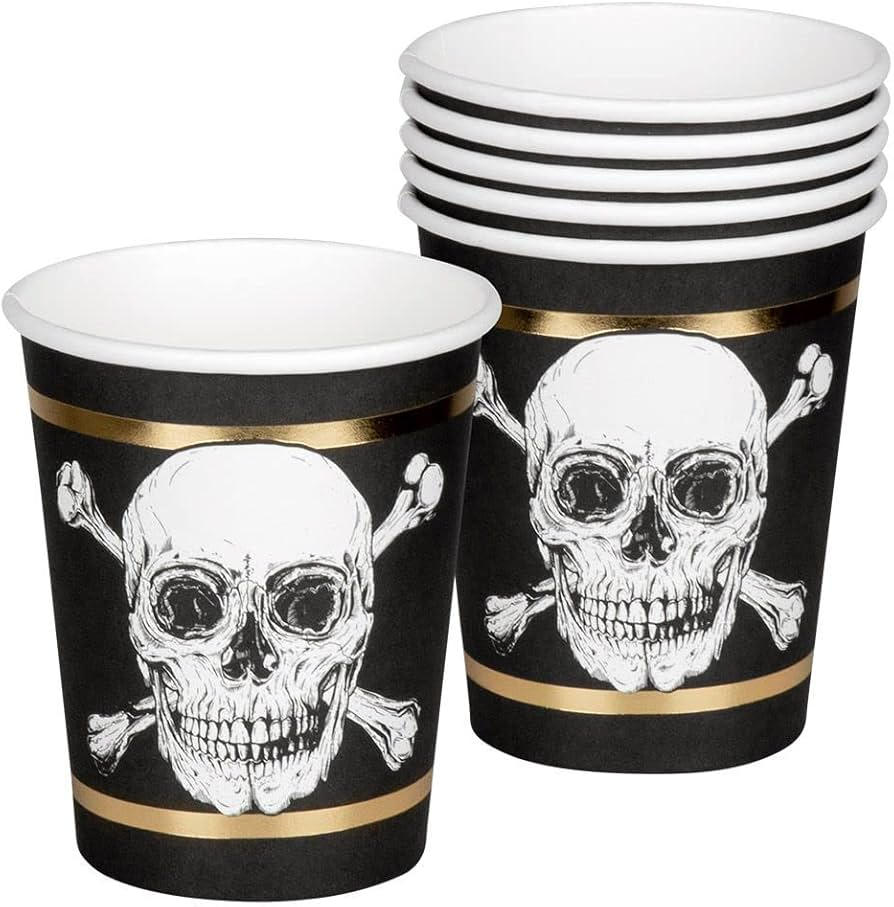

In [67]:
# 3 product recommended
arl_recommender(rules, "21987", 3)

['21669', '20677', '21239']

### Recommendated Products:


In [68]:
[[check_id(df_with_one_country, i) for i in arl_recommender(rules, product, 3)] for product in l]

['BLUE STRIPE CERAMIC DRAWER KNOB']
['PINK SPOTTY BOWL']
['PINK  SPOTTY CUP']
['ROUND SNACK BOXES ,SET 4, FRUITS ']
['PINK SPOTTY BOWL']
['PINK  SPOTTY CUP']


[[None, None, None], [], [None, None, None]]

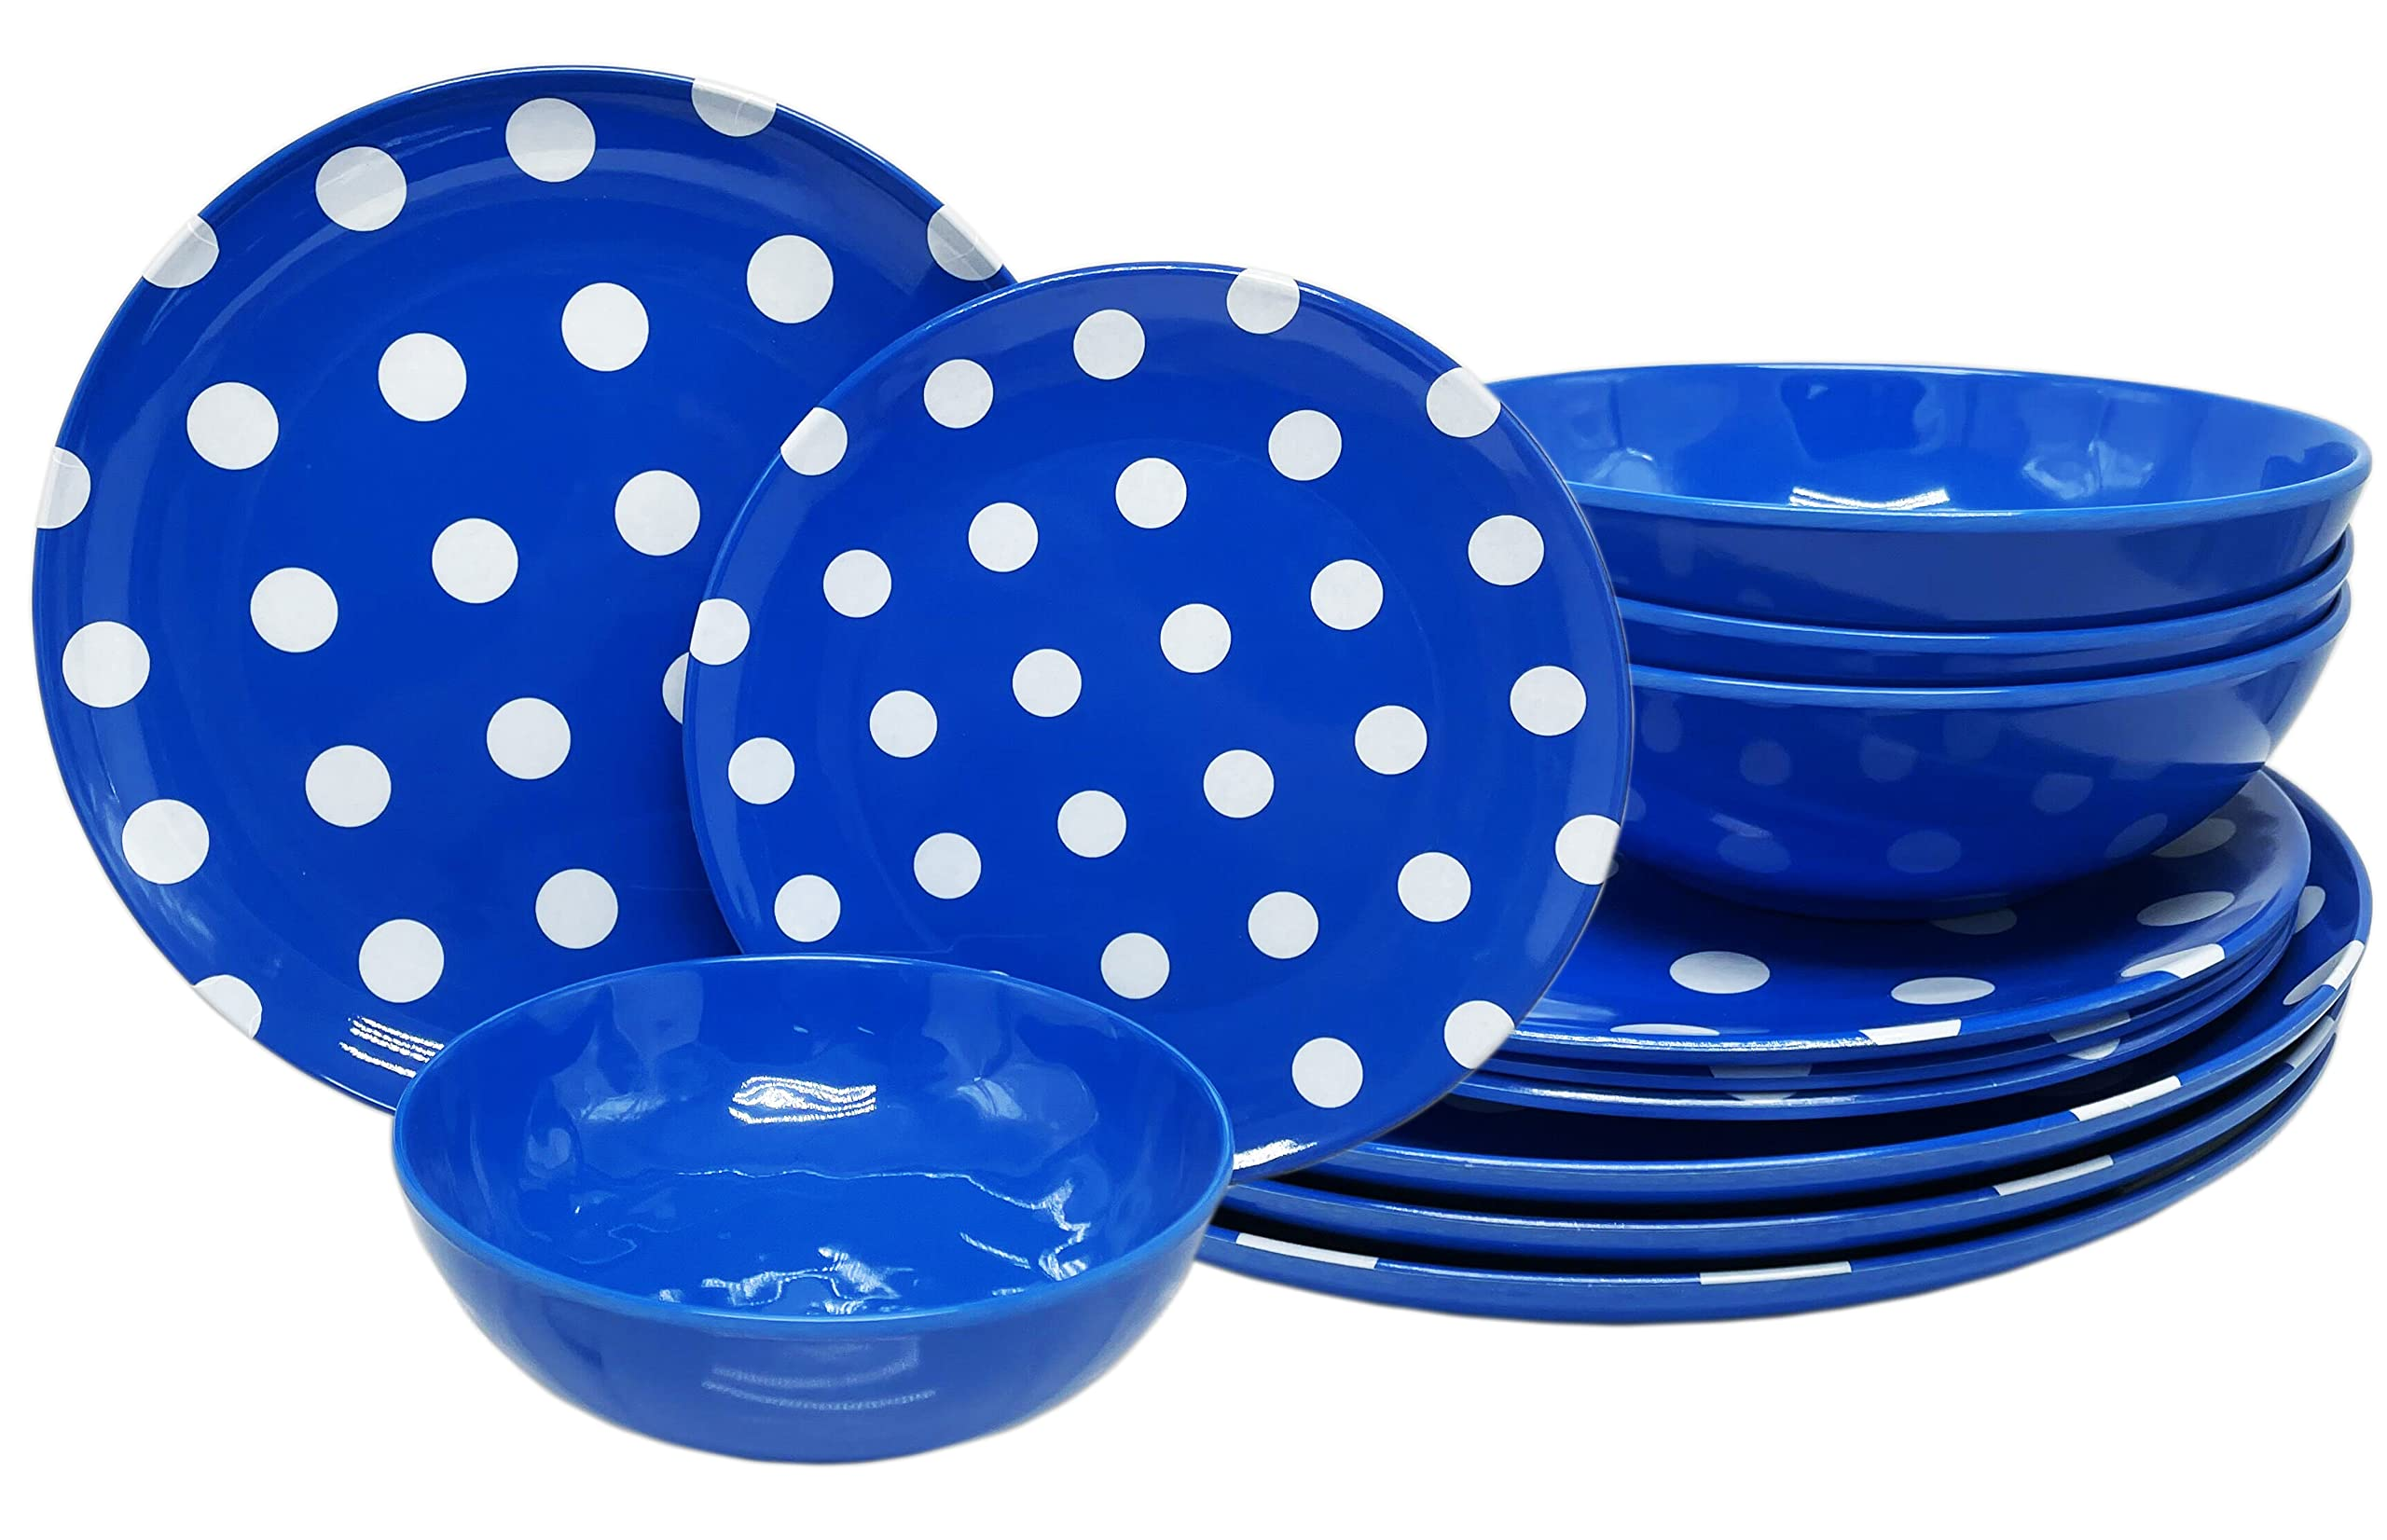

As we you can see we get recommanded plates and bowls if we are purchasing the glasses, which will be helpful for the customers

## Dimensionality Reduction:

In [69]:
df_Dim = retail_df.copy()

In [70]:
df_Dim.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount Day_time_type  
0        1     7      45       0  December  Tuesday         83.4       Morning  
1        1     7      45       0  December  Tuesday         81.0       Morning  
2        1     7      45       0  December  Tuesday         81.0       Morning  
3        1     7      45       0  December  Tuesday        100.8       Morning  
4        1     7      45       0  December  Tuesday         30.0       Morning

In [71]:
df_Dim.shape

(805549, 18)

In [72]:
# Step 4: Dimensionality Reduction

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### 4.1 Creating Customer-Product Matrix ###

# Pivot the dataset to create a matrix where:
# - Rows represent customers (Customer ID)
# - Columns represent products (StockCode)
# - Values represent the sum of quantities purchased for each product by each customer.
# Note: This might create a very large sparse matrix. If memory is an issue, consider sparse data structures.
customer_product_matrix = df_Dim.pivot_table(
    index='Customer ID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)

# Replace NaN with 0, since a missing value indicates no purchase
customer_product_matrix = customer_product_matrix.fillna(0)

# Applying Dimensionality Reduction Techniques:

# Objective: Reduce dimensionality using PCA

# 1. Standardize the data
# PCA is influenced by scale, so it's important to standardize the features
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

# 2. Apply PCA
# First, we fit PCA with no n_components to examine explained variance
pca = PCA()
pca.fit(customer_product_matrix_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine number of components needed to explain, say, 80% of the variance
threshold = 0.8
n_components = np.argmax(cumulative_variance >= threshold) + 1  # +1 because indices start at 0

print(f"Number of components to retain for 80% variance: {n_components}")

# 3. Transform the data with the selected number of principal components
pca_reducer = PCA(n_components=n_components)
customer_product_matrix_pca = pca_reducer.fit_transform(customer_product_matrix_scaled)

# The result 'customer_product_matrix_pca' is now a reduced representation of the original high-dimensional data.
# You can now use this reduced dataset for further analysis, such as clustering, segmentation, or building models.

print("Shape of the reduced data:", customer_product_matrix_pca.shape)


Number of components to retain for 80% variance: 499
Shape of the reduced data: (5878, 499)


In [73]:
customer_product_matrix_pca

array([[-2.3187191 , -1.4638792 , -0.18440656, ..., -0.02590748,
        -0.06121123, -0.16492967],
       [ 4.08862156,  2.39583487, -1.07887775, ...,  0.41101626,
         5.06730248,  1.34815057],
       [-1.06237623,  0.20420097, -0.72067907, ...,  0.25859612,
         1.2781233 ,  0.06234166],
       ...,
       [-2.0993527 , -1.36799405, -0.28080235, ...,  0.03997277,
         0.14647508,  0.01200818],
       [-1.10723202, -0.84316712, -0.34066434, ..., -0.17748723,
         1.79576059,  0.074822  ],
       [ 2.83613943,  1.55110945, -0.5318991 , ...,  0.62150645,
         0.90777004, -2.70471696]])

## Customer Segmentation using Clustering - GMM

- In this step, we will use the PCA-transformed data (customer_product_matrix_pca) obtained from the previous steps to segment customers. The idea is to cluster customers based on their purchasing behavior using a Gaussian Mixture Model (GMM).

**Why GMM?**

GMM is a probabilistic model that assumes data is generated from a mixture of several Gaussian distributions.
Unlike methods like K-Means (which is spherical and distance-based), GMM can model clusters of different shapes
and covariance structures. The Expectation-Maximization (EM) algorithm finds the parameters of these Gaussian
distributions that best fit the data. This approach can be more flexible and often more accurate for complex data.

In [74]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
df_cluster = retail_df.copy()

In [76]:
df_cluster.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount Day_time_type  
0        1     7      45       0  December  Tuesday         83.4       Morning  
1        1     7      45       0  December  Tuesday         81.0       Morning  
2        1     7      45       0  December  Tuesday         81.0       Morning  
3        1     7      45       0  December  Tuesday        100.8       Morning  
4        1     7      45       0  December  Tuesday         30.0       Morning

### Determining the Optimal Number of Clusters

Number of components selected: 499
Shape of reduced data: (5878, 499)


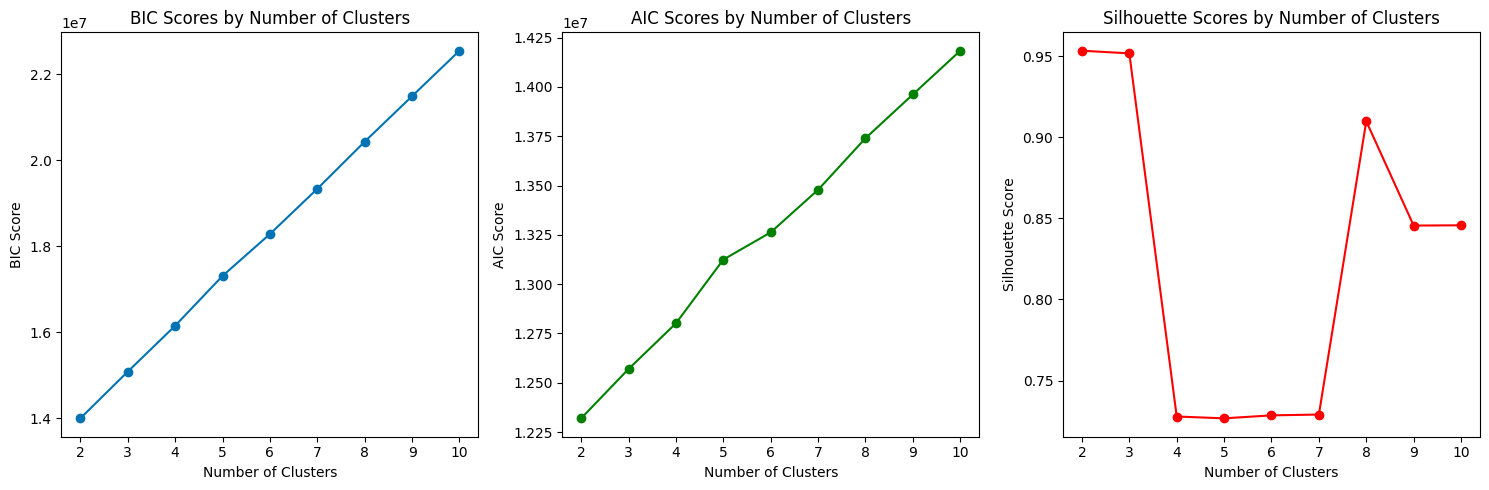

In [77]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ---------------------------------------------
# Starting point: We have 'df_cluster' as our original dataframe.
# This dataframe has columns including 'Customer ID', 'StockCode', 'Quantity', 'TotalAmount', etc.
# We want to:
# 1. Create a customer-product matrix from df_cluster.
# 2. Perform PCA to reduce dimensionality.
# 3. Use Gaussian Mixture Models to cluster customers.
# 4. Determine the optimal number of clusters using BIC, AIC, and also compute Silhouette Scores.
# 5. Fit the GMM with the chosen number of clusters and analyze the segments.
# ---------------------------------------------

# Assuming df_cluster is the DataFrame as given:
# df_cluster:
#   Invoice | StockCode | Description | Quantity | InvoiceDate | Price | Customer ID | Country | year | ... | TotalAmount | Day_time_type

# Check the data briefly
# print(df_cluster.head())

# ---------------------------------------------
# Step 1: Create Customer-Product Matrix
# ---------------------------------------------
# We pivot the table so that:
# Rows = Customer ID
# Columns = StockCode
# Values = Sum of Quantities purchased
customer_product_matrix = df_cluster.pivot_table(
    index='Customer ID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Now we have a high-dimensional matrix of customers vs products.
# Each row is a customer, each column is a product, values are quantities purchased.

# ---------------------------------------------
# Step 2: Apply PCA for Dimensionality Reduction
# ---------------------------------------------
# First, standardize the data (mean=0, variance=1)
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

# Fit PCA without specifying n_components to inspect explained variance
pca = PCA()
pca.fit(customer_product_matrix_scaled)

# Decide how many components to keep (e.g., enough to explain 80% variance)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.8
n_components = np.argmax(cumulative_variance >= threshold) + 1

# Transform the data using PCA
pca_reducer = PCA(n_components=n_components)
customer_product_matrix_pca = pca_reducer.fit_transform(customer_product_matrix_scaled)

print("Number of components selected:", n_components)
print("Shape of reduced data:", customer_product_matrix_pca.shape)

# ---------------------------------------------
# Step 3: Determine Optimal Number of Clusters using GMM
# ---------------------------------------------
# We will:
# - Fit GMM for different numbers of clusters (say 2 to 10)
# - Calculate BIC, AIC, and Silhouette scores for each model
# - Choose the number of clusters based on minimal BIC/AIC and good silhouette score

n_components_range = range(2, 11)
bic_scores = []
aic_scores = []
sil_scores = []

for n in n_components_range:
    # Fit GMM
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(customer_product_matrix_pca)

    # Predict cluster labels
    labels = gmm.predict(customer_product_matrix_pca)

    # Compute BIC and AIC
    bic_scores.append(gmm.bic(customer_product_matrix_pca))
    aic_scores.append(gmm.aic(customer_product_matrix_pca))

    # Compute Silhouette Score
    # Silhouette score measures how similar an object is to its own cluster compared to other clusters.
    # Higher silhouette scores mean better-defined clusters.
    # Note: For silhouette_score, we need a predicted cluster label for each sample.
    sil = silhouette_score(customer_product_matrix_pca, labels)
    sil_scores.append(sil)

# Plot BIC, AIC, and Silhouette Scores to visually inspect
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(n_components_range, bic_scores, marker='o')
ax[0].set_title('BIC Scores by Number of Clusters')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('BIC Score')

ax[1].plot(n_components_range, aic_scores, marker='o', color='green')
ax[1].set_title('AIC Scores by Number of Clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('AIC Score')

ax[2].plot(n_components_range, sil_scores, marker='o', color='red')
ax[2].set_title('Silhouette Scores by Number of Clusters')
ax[2].set_xlabel('Number of Clusters')
ax[2].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

**Optimal Number of Clusters = 3**

Based on the above metrics, 3 clusters appears to be the optimal choice because:
- It maintains a high Silhouette score (≈0.95) indicating well-defined clusters
- It occurs before the sharp increase in both AIC and BIC scores
- It represents a good balance between model complexity and cluster quality
- The metrics show minimal improvement or deterioration beyond this point

This conclusion is supported by the "elbow" visible in the Silhouette score at k=3, and the relatively low AIC and BIC values at this point.

### Fitting GMM

In [78]:
# Determine the optimal number of clusters.
# Here, we look for the lowest BIC or AIC and also consider a reasonably high silhouette score.
# For example, let's pick the cluster count that minimizes BIC:
optimal_n_components = 3


# ---------------------------------------------
# Step 4: Fit GMM with Optimal Clusters and Assign Segments
# ---------------------------------------------
gmm_optimal = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=42)
gmm_optimal.fit(customer_product_matrix_pca)
cluster_labels = gmm_optimal.predict(customer_product_matrix_pca)

# Create a DataFrame to store cluster assignments
# Index of customer_product_matrix is the Customer ID
customer_segments = pd.DataFrame(index=customer_product_matrix.index)
customer_segments['Cluster'] = cluster_labels

print("Cluster assignments for a few customers:")
print(customer_segments.head())

Cluster assignments for a few customers:
             Cluster
Customer ID         
12346.0            1
12347.0            1
12348.0            1
12349.0            1
12350.0            1


### Analysing Clusters

In [79]:
# ---------------------------------------------
# Step 5: Analyze Customer Segments
# ---------------------------------------------
# Merge cluster labels back to df_cluster for detailed analysis.
df_analysis = df_cluster.merge(customer_segments, how='left', left_on='Customer ID', right_index=True)

# Example: Calculate average spending per cluster
avg_spending_per_cluster = df_analysis.groupby('Cluster')['TotalAmount'].mean()
print("Average spending per cluster:")
print(avg_spending_per_cluster)

# Example: Identify top products in each cluster
top_products_per_cluster = (
    df_analysis.groupby(['Cluster', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
)

for c in range(optimal_n_components):
    cluster_data = top_products_per_cluster[top_products_per_cluster['Cluster'] == c]
    top_5 = cluster_data.sort_values(by='Quantity', ascending=False).head(5)
    print(f"\nTop 5 products in cluster {c}:")
    print(top_5)

# After inspecting these statistics, we can start to profile each segment:
# - Which cluster has the highest spending?
# - Which cluster prefers certain types of products?
# - Are there clusters that buy only during specific months or seasons?

# This information helps in tailoring marketing and sales strategies.

Average spending per cluster:
Cluster
0    127.254790
1     19.776239
2     26.320376
Name: TotalAmount, dtype: float64

Top 5 products in cluster 0:
      Cluster StockCode  Quantity
383         0     21212     13056
994         0     22189     11728
2827        0    85099B     11722
993         0     22188     10306
1375        0     22630      8268

Top 5 products in cluster 1:
      Cluster StockCode  Quantity
6343        1     84077    107105
7011        1    85123A     84405
6989        1    85099B     83091
5664        1     23843     80995
5263        1     23166     77147

Top 5 products in cluster 2:
      Cluster StockCode  Quantity
9017        2     22952      2232
9015        2     22950      1704
8981        2     22909      1680
8431        2     22197      1496
7868        2     21212      1440


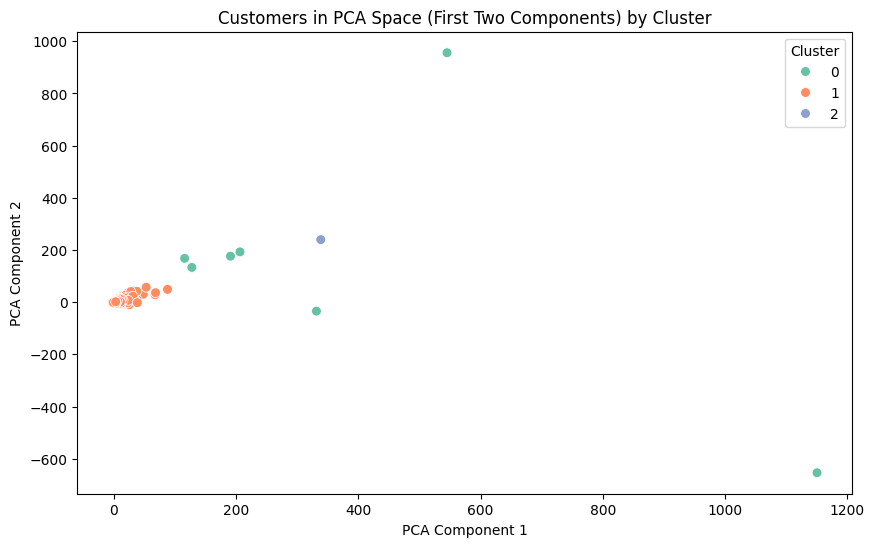

In [80]:
# 1. 2D Scatter Plot using the first two PCA components colored by cluster
pca_2d = PCA(n_components=2).fit_transform(customer_product_matrix_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=cluster_labels, palette='Set2', s=50)
plt.title('Customers in PCA Space (First Two Components) by Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [81]:
customer_segments.head()

Cluster
Customer ID         
12346.0            1
12347.0            1
12348.0            1
12349.0            1
12350.0            1

In [82]:
customer_segments['Cluster'].value_counts()

Cluster
1    5870
0       7
2       1
Name: count, dtype: int64

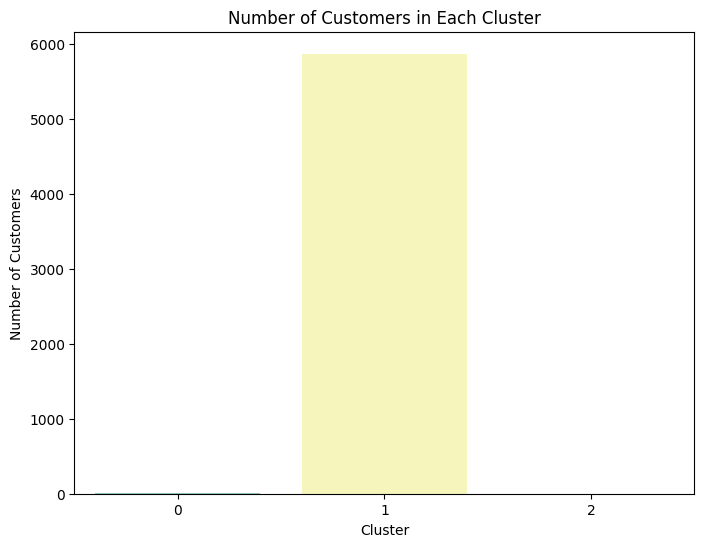

In [83]:
# 2. Cluster Size Distribution
cluster_counts = customer_segments['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set3')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

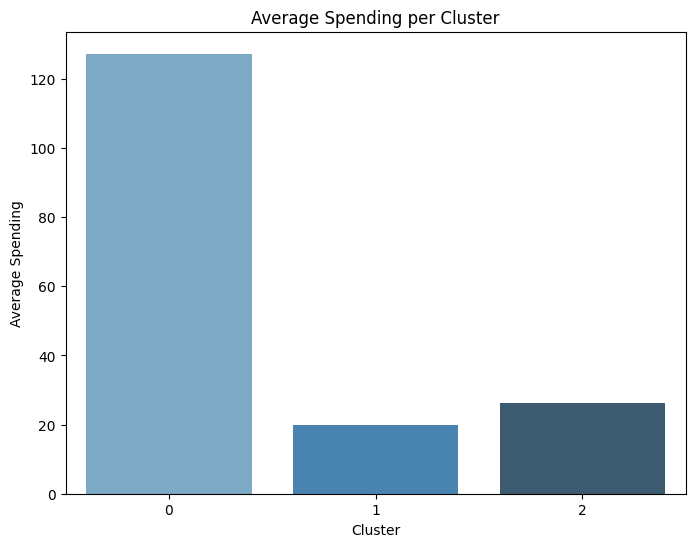

In [84]:
# 3. Average Spending per Cluster
plt.figure(figsize=(8, 6))
avg_spending = df_analysis.groupby('Cluster')['TotalAmount'].mean().sort_values()
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='Blues_d')
plt.title('Average Spending per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.show()

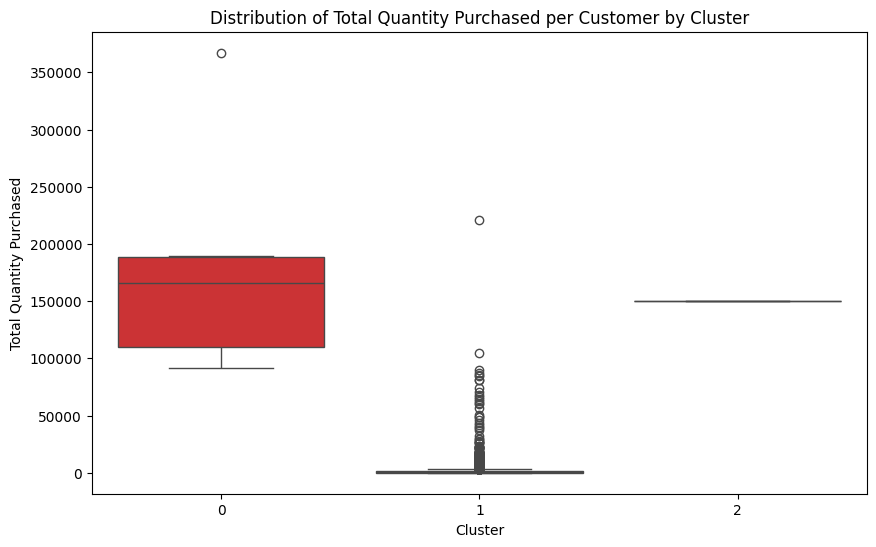

In [85]:
# 4. Distribution of Quantities per Cluster (Box Plot)
# This shows how purchase quantities vary across clusters.
cluster_quantity_stats = df_analysis.groupby(['Cluster', 'Customer ID'])['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Quantity', data=cluster_quantity_stats, palette='Set1')
plt.title('Distribution of Total Quantity Purchased per Customer by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity Purchased')
plt.show()

## Clustering Using K-Means:

Number of PCA components selected: 499
Shape of reduced data: (5878, 499)


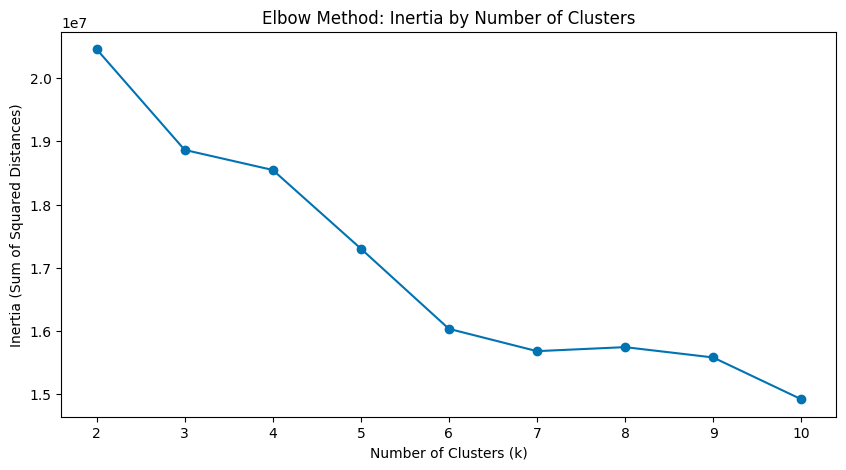

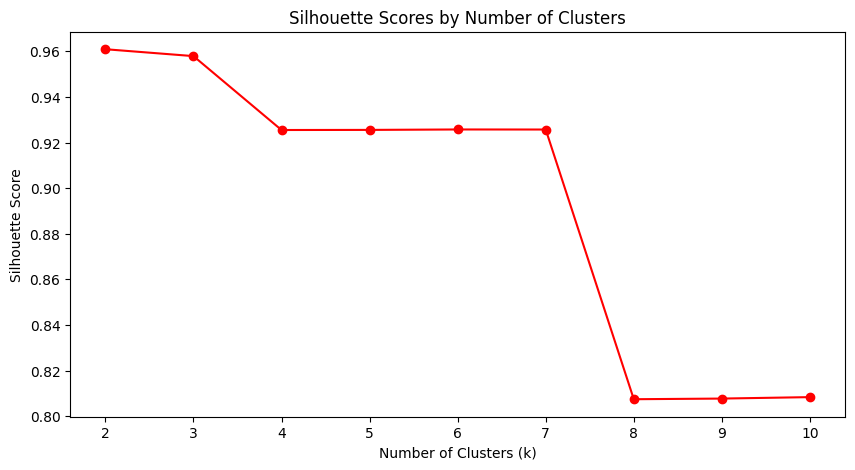

Optimal number of clusters based on silhouette score: 2
Cluster assignments for a few customers:
             Cluster
Customer ID         
12346.0            0
12347.0            0
12348.0            0
12349.0            0
12350.0            0
Average spending per cluster:
Cluster
0     21.298694
1    575.445794
Name: TotalAmount, dtype: float64

Top 5 products in cluster 0:
      Cluster StockCode  Quantity
3407        0     84077    109169
4055        0    85099B     94883
4077        0    85123A     92769
600         0     21212     91263
2724        0     23843     80995

Top 5 products in cluster 1:
      Cluster StockCode  Quantity
4760        1     22189     11324
4759        1     22188      9938
4963        1     82484      6001
4703        1     21623      5168
4721        1     21877      3712


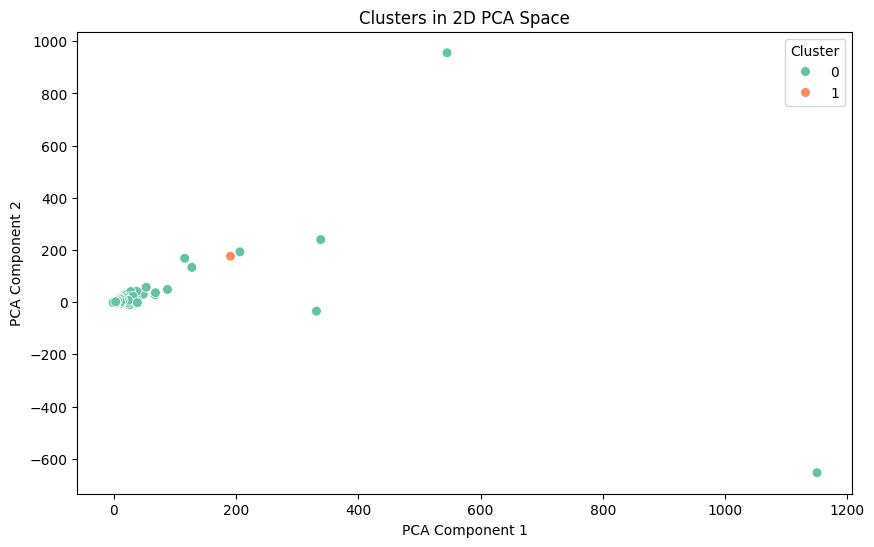

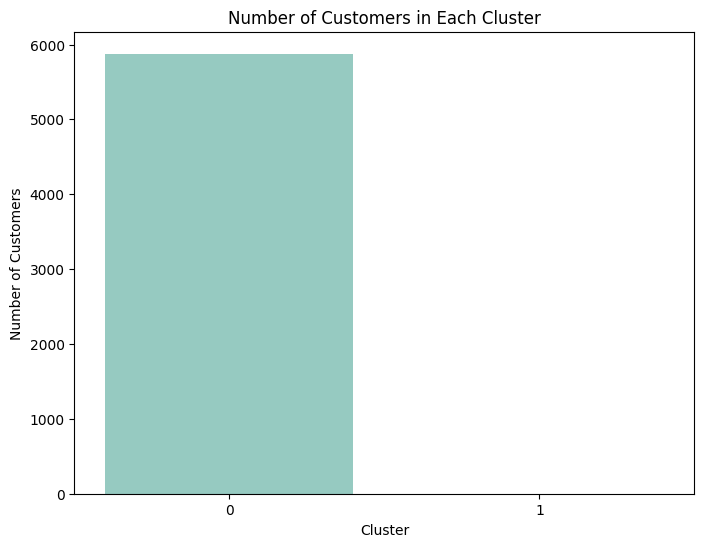

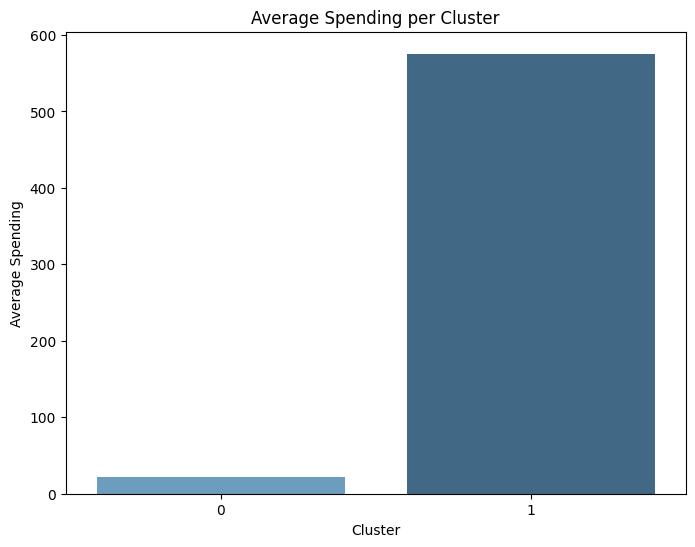

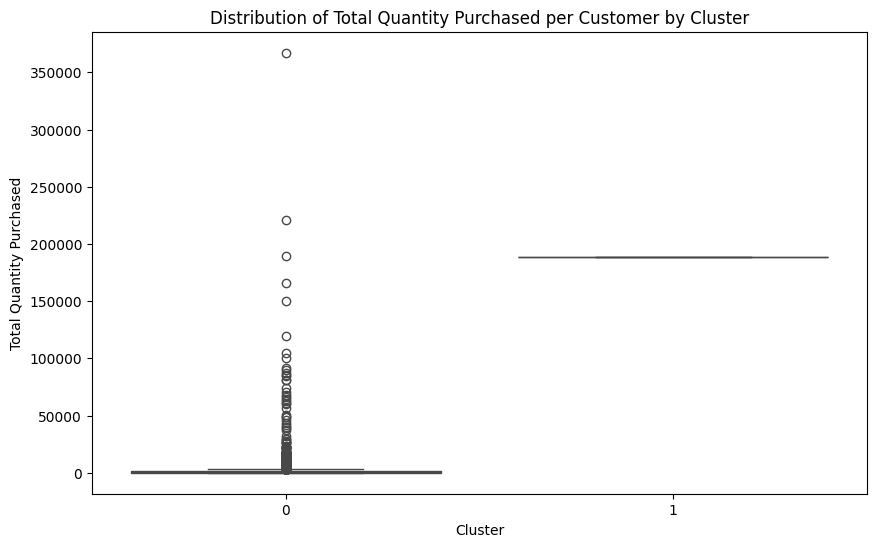

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Assume df_cluster is already loaded and looks like:
# Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID',
#           'Country', 'year', 'month_num', 'day_num', 'hour', 'minute', 'second', 'Month', 'Day', 'TotalAmount', 'Day_time_type']
# ---------------------------------------------

# Step 1: Create Customer-Product Matrix
# Rows = Customer ID, Columns = StockCode, Values = sum of Quantity purchased
customer_product_matrix = df_cluster.pivot_table(
    index='Customer ID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Step 2: Dimensionality Reduction with PCA
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

# Fit PCA to determine how many components explain ~80% variance
pca = PCA()
pca.fit(customer_product_matrix_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.8
n_components = np.argmax(cumulative_variance >= threshold) + 1

# Apply PCA transformation
pca_reducer = PCA(n_components=n_components)
customer_product_matrix_pca = pca_reducer.fit_transform(customer_product_matrix_scaled)

print("Number of PCA components selected:", n_components)
print("Shape of reduced data:", customer_product_matrix_pca.shape)

# For visualization, also create a 2D PCA version
pca_2d = PCA(n_components=2).fit_transform(customer_product_matrix_scaled)

# Step 3: Determine Optimal Number of Clusters for K-Means
# We'll use the Elbow Method (Inertia) and Silhouette Score
range_n_clusters = range(2, 11)
inertia_scores = []
sil_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_product_matrix_pca)
    inertia_scores.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(customer_product_matrix_pca, labels))

# Plotting the Elbow Method (Inertia)
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters, inertia_scores, marker='o')
plt.title('Elbow Method: Inertia by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters, sil_scores, marker='o', color='red')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on the elbow in the inertia plot and/or high silhouette score.
# Let's assume the optimal number of clusters is the one with a noticeable "bend" in the elbow plot
# or the highest silhouette score.
optimal_k = range_n_clusters[np.argmax(sil_scores)]
print("Optimal number of clusters based on silhouette score:", optimal_k)

# Step 4: Fit K-Means with the Optimal Clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(customer_product_matrix_pca)
cluster_labels = kmeans_optimal.labels_

# Create a DataFrame to store cluster assignments
customer_segments = pd.DataFrame(index=customer_product_matrix.index)
customer_segments['Cluster'] = cluster_labels

print("Cluster assignments for a few customers:")
print(customer_segments.head())

# Merge cluster assignments back to df_cluster for further analysis
df_analysis = df_cluster.merge(customer_segments, how='left', left_on='Customer ID', right_index=True)

# Step 5: Analyze Clusters
# Example: Average spending per cluster
avg_spending_per_cluster = df_analysis.groupby('Cluster')['TotalAmount'].mean()
print("Average spending per cluster:")
print(avg_spending_per_cluster)

# Top products per cluster
top_products_per_cluster = (
    df_analysis.groupby(['Cluster', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
)

for c in range(optimal_k):
    cluster_data = top_products_per_cluster[top_products_per_cluster['Cluster'] == c]
    top_5 = cluster_data.sort_values(by='Quantity', ascending=False).head(5)
    print(f"\nTop 5 products in cluster {c}:")
    print(top_5)

# Step 6: Additional Visualizations

# 1. 2D Scatter Plot of Clusters in PCA Space
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=cluster_labels, palette='Set2', s=50)
plt.title('Clusters in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 2. Cluster Size Distribution
cluster_counts = customer_segments['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set3')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# 3. Average Spending per Cluster (Bar Chart)
avg_spending = df_analysis.groupby('Cluster')['TotalAmount'].mean().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=avg_spending.index, y=avg_spending.values, palette='Blues_d')
plt.title('Average Spending per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.show()

# 4. Distribution of Quantities per Cluster (Box Plot)
cluster_quantity_stats = df_analysis.groupby(['Cluster', 'Customer ID'])['Quantity'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='Quantity', data=cluster_quantity_stats, palette='Set1')
plt.title('Distribution of Total Quantity Purchased per Customer by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Quantity Purchased')
plt.show()

# By examining these plots and metrics:
# - The elbow plot and silhouette scores help us choose k.
# - The 2D scatterplot in PCA space shows cluster separation.
# - The cluster size distribution indicates the relative sizes of each segment.
# - The average spending and product preference plots help us understand the nature of each cluster.

# Thus, K-Means clustering provides insights into customer segments, aiding in targeted marketing or personalized recommendations.


## Customer Segmentation (RFM, KMeans)

In [87]:
import datetime as dt

In [88]:
df_seg = retail_df.copy()

In [89]:
df_seg['Revenue'] = df_seg['Quantity'] * df_seg['Price']
df_seg.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month_num  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009         12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009         12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009         12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009         12   

   day_num  hour  minute  second     Month      Day  TotalAmount  \
0        1     7      45       0  December  Tuesday         83.4   
1        1     7      45       0  December  Tuesday         81.0   
2        1     7      45       0  December  Tuesday         81.0   
3        1     7      45       0  December  Tuesday        100.8   
4        1     7      45       0  December  Tuesday         30.0   

  Day_time_type  Revenue  
0       Morning     83.4  
1       Morning     81.0  
2       Morning     81.0  
3       Morning    100.8  
4       Morning     30.0

In [90]:
df_seg['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [91]:
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

### RFM

In [92]:
# creating RFM DataFrame
df_rfm = df_seg.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (analysis_date-InvoiceDate.max()).days,#recency
                              'Invoice': lambda Invoice: Invoice.nunique(),#frequency
                              'Revenue': lambda Revenue: Revenue.sum()#Monetary
                              })

In [93]:
# rename columns
df_rfm.columns = ['recency', 'frequency', 'monetary']
df_rfm.head()

recency  frequency  monetary
Customer ID                              
12346.0          326         12  77556.46
12347.0            2          8   5633.32
12348.0           75          5   2019.40
12349.0           19          4   4428.69
12350.0          310          1    334.40

In [94]:
df_rfm.describe().T

count         mean           std   min       25%      50%  \
recency    5878.0   201.331916    209.338707  1.00   26.0000   96.000   
frequency  5878.0     6.289384     13.009406  1.00    1.0000    3.000   
monetary   5878.0  3018.616737  14737.731040  2.95  348.7625  898.915   

               75%        max  
recency     380.00     739.00  
frequency     7.00     398.00  
monetary   2307.09  608821.65

In [95]:
cluster_rfm = df_rfm.copy()

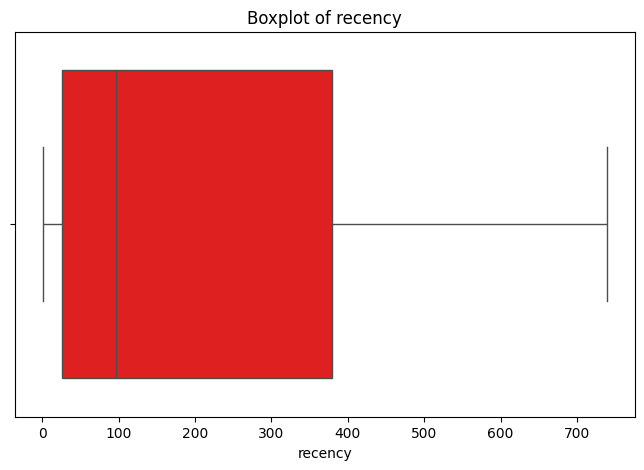

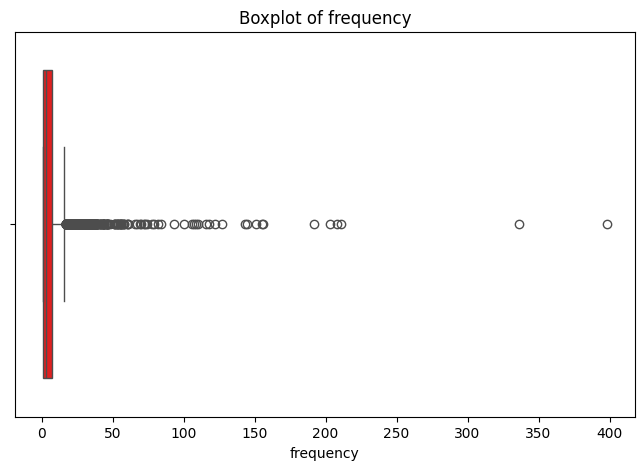

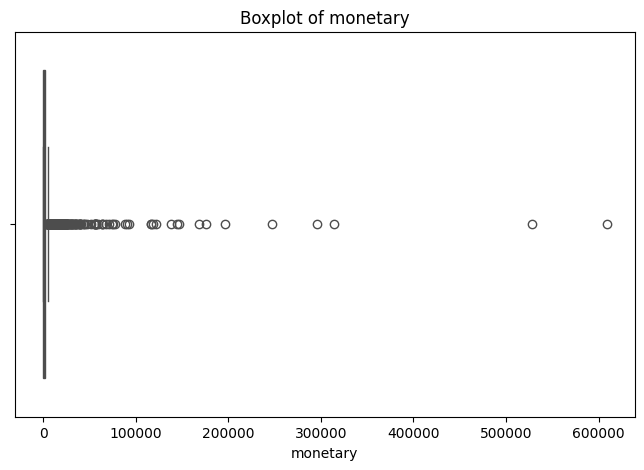

In [97]:
# Chaecking Outliers using Boxplot
for col in ['recency', 'frequency', 'monetary']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, data=cluster_rfm, color='red')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [98]:
# Checking number of outliers
def num_outliers(df):
    for col in df.columns:
        # calculate Q1 dan Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # lower and upper bound
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print("Outliers:")
        print(len(outliers))

In [99]:
num_outliers(cluster_rfm)


Outliers:
0
Outliers:
427
Outliers:
628


In [100]:
# Replace outliers with the Bound values
def replace_outliers(df):
    for col in df.columns:
        # calculate Q1 dan Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # lower and upper bound
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df.loc[(df[col] < lower_bound), col] = lower_bound
        df.loc[(df[col] > upper_bound), col] = upper_bound

In [101]:
replace_outliers(cluster_rfm)
num_outliers(cluster_rfm)

Outliers:
0
Outliers:
0
Outliers:
0


In [102]:
cluster_rfm.describe().T

count         mean          std   min       25%      50%      75%  \
recency    5878.0   201.331916   209.338707  1.00   26.0000   96.000   380.00   
frequency  5878.0     4.900476     4.622499  1.00    1.0000    3.000     7.00   
monetary   5878.0  1612.448243  1680.283894  2.95  348.7625  898.915  2307.09   

                  max  
recency     739.00000  
frequency    16.00000  
monetary   5244.58125

In [103]:
# Create quantiles for Recency, Frequency, and Monetary value
r_bins = np.linspace(0, cluster_rfm['recency'].max()+1, 6, dtype=int)
f_bins = np.linspace(0, cluster_rfm['frequency'].max()+1, 6, dtype=int)
m_bins = np.linspace(0, cluster_rfm['monetary'].max()+1, 6, dtype=int)

# Assign R, F, and M scores to each customer based on their quartile
cluster_rfm['R'] = pd.cut(cluster_rfm['recency'], bins=r_bins, labels=[5, 4, 3, 2, 1])
cluster_rfm['F'] = pd.cut(cluster_rfm['frequency'], bins=f_bins, labels=[1, 2, 3, 4, 5])
cluster_rfm['M'] = pd.cut(cluster_rfm['monetary'], bins=m_bins, labels=[1, 2, 3, 4, 5])

In [104]:
# create the RF_score using the recency_score and frequency_score.
cluster_rfm["RF_Score"] = cluster_rfm["R"].astype(str) + cluster_rfm["F"].astype(str)
cluster_rfm.head()

recency  frequency    monetary  R  F  M RF_Score
Customer ID                                                  
12346.0          326         12  5244.58125  3  4  5       34
12347.0            2          8  5244.58125  5  3  5       53
12348.0           75          5  2019.40000  5  2  2       52
12349.0           19          4  4428.69000  5  2  5       52
12350.0          310          1   334.40000  3  1  1       31

In [105]:
seg_map = {
    r'[1-2][1-2]' : 'Dormant Accounts',
    r'[1-2][3-4]' : 'Churning Customers',
    r'[1-2]5' : 'High-Value At Risk',
    r'3[1-2]' : 'Fading Segment',
    r'33' : 'Recovery Priority',
    r'[3-4][4-5]' : 'Premium Regulars',
    r'41' : 'Rising Stars',
    r'51' : 'Recent Acquistions',
    r'[4-5][2-3]' : 'Growth Prospects',
    r'5[4-5]' : 'Elite Members'}


- **Dormant Accounts:**	For customers with low R and F scores (1-2, 1-2), indicating inactive purchasing patterns
- **Churning Customers:**	For customers with low R but moderate F scores (1-2, 3-4), showing declining engagement
- **High-Value At Risk:**	For customers with specific pattern (1-2, 5), representing valuable customers showing reduced activity
- **Fading Segment:**	For customers with low overall scores (1-2), showing signs of disengagement
- **Recovery Priority:**	For the specific 3,3 pattern, indicating customers requiring immediate engagement
- **Premium Regulars:**	For high-scoring customers (3-4, 4-5), showing consistent purchasing behavior
- **Rising Stars:**	For pattern 4,1, indicating emerging loyal customers
- **Recent Acquistions:**	For pattern 5,1, representing newly engaged customers
- **Growth Prospects:**	For customers with good R but moderate F scores (4-5, 2-3)
- **Elite Members:**	For highest-scoring customers (4-5), representing the most valuable segment


In [106]:
# Segmentating RF_score base on seg_map
cluster_rfm["segment"] = cluster_rfm["RF_Score"].replace(seg_map, regex = True)

In [107]:
cluster_rfm.head()

recency  frequency    monetary  R  F  M RF_Score  \
Customer ID                                                     
12346.0          326         12  5244.58125  3  4  5       34   
12347.0            2          8  5244.58125  5  3  5       53   
12348.0           75          5  2019.40000  5  2  2       52   
12349.0           19          4  4428.69000  5  2  5       52   
12350.0          310          1   334.40000  3  1  1       31   

                      segment  
Customer ID                    
12346.0      Premium Regulars  
12347.0      Growth Prospects  
12348.0      Growth Prospects  
12349.0      Growth Prospects  
12350.0        Fading Segment

In [108]:
cluster_rfm['segment'].value_counts(normalize=True)

segment
Growth Prospects      0.256380
Recent Acquistions    0.204491
Dormant Accounts      0.149711
Fading Segment        0.147329
Elite Members         0.138312
Rising Stars          0.084723
Premium Regulars      0.009697
Recovery Priority     0.005784
Churning Customers    0.003232
High-Value At Risk    0.000340
Name: proportion, dtype: float64

In [109]:
cluster_mean = cluster_rfm[['recency','frequency','monetary','segment']].groupby('segment').mean()
cluster_mean

recency  frequency     monetary
segment                                               
Churning Customers  531.684211   8.736842  2597.072763
Dormant Accounts    581.275000   1.576136   496.793583
Elite Members        26.033210  14.442804  4562.269958
Fading Segment      385.799076   2.159353   710.947373
Growth Prospects     70.332449   6.195753  2134.357890
High-Value At Risk  536.500000  16.000000  5244.581250
Premium Regulars    263.912281  13.491228  3980.038895
Recent Acquistions   50.397671   1.943428   690.226621
Recovery Priority   372.000000   7.823529  2356.928051
Rising Stars        223.303213   1.807229   608.484871

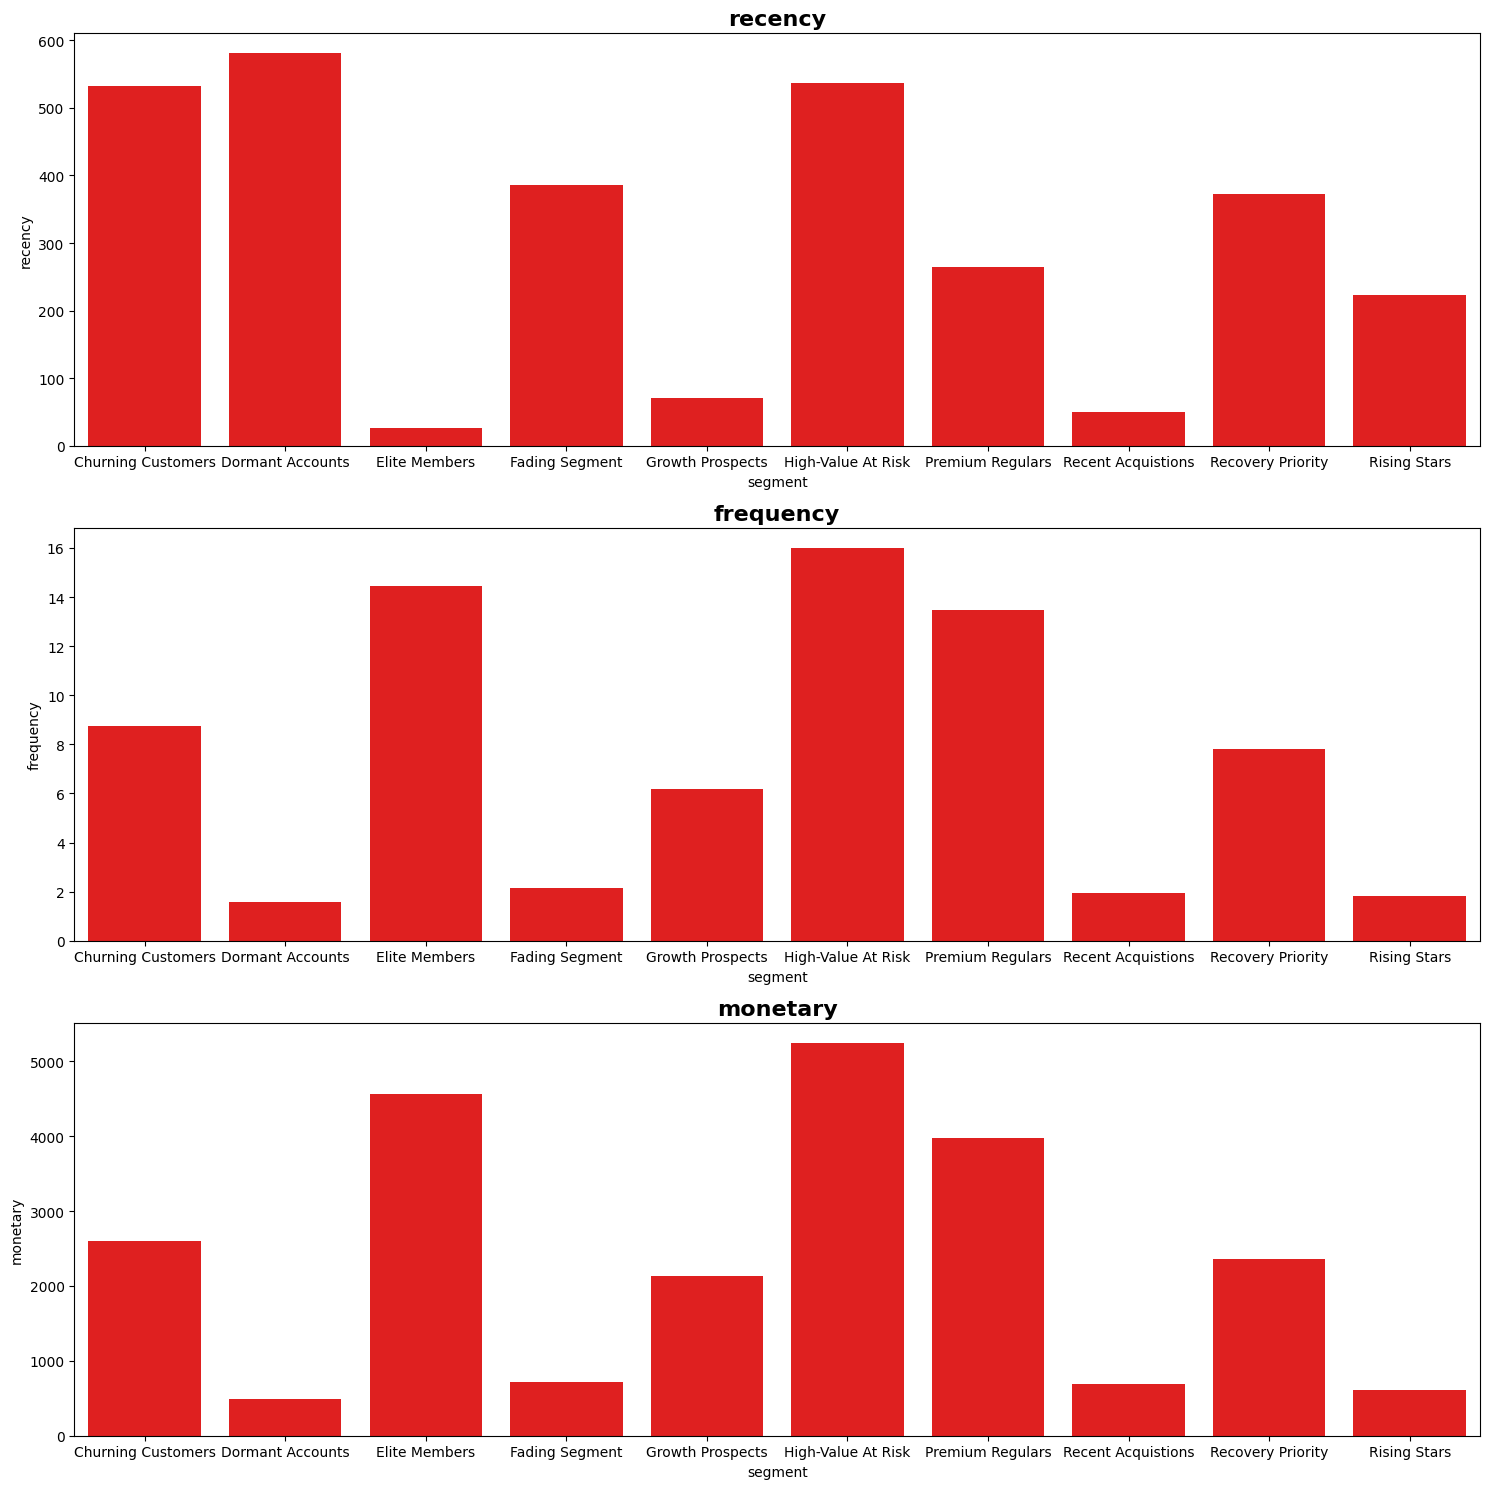

In [110]:
fig= plt.subplots(nrows=3 , ncols=1 , figsize=(15,15))
for i, col in enumerate(cluster_mean.columns):
    plt.subplot(3,1,i+1)
    ax=  sns.barplot(x=cluster_mean.index, y=cluster_mean[col], data=cluster_mean, color='red' )
    plt.title(col, fontweight='bold', fontsize=16)
plt.tight_layout()

**Key Distribution Findings**
The customer base is primarily composed of Growth Prospects (25%) and Recent Acquisitions (20%), representing significant growth opportunities.

**Strategic Recommendations**

**Growth & Retention Strategies**
- Implement targeted loyalty programs with tiered benefits
- Offer strategic discounts to encourage repeat purchases
- Develop personalized promotional campaigns for each segment

**Premium Customer Enhancement**
For Premium Regulars and Elite Members:
- Exclusive VIP rewards and special discount tiers
- Complimentary shipping services
- Premium customer service access
- Loyalty milestone rewards

**Reactivation Initiatives**
For Dormant Accounts, Fading Segment, and Churning Customers:
- Personalized re-engagement discount offers
- Product discovery campaigns
- Customer feedback collection through satisfaction surveys
- Enhanced customer service support
- Targeted reactivation programs with special incentives

This segmentation-based approach allows for more efficient resource allocation and personalized marketing efforts, ultimately aiming to move customers up the value chain while reducing churn in at-risk segments.


## Kmeans

In [111]:
!pip install kneed

In [112]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator

In [114]:
kmean_rfm_df = df_rfm.copy()

In [115]:
num_outliers(kmean_rfm_df)

Outliers:
0
Outliers:
427
Outliers:
628


In [116]:
replace_outliers(kmean_rfm_df)
num_outliers(kmean_rfm_df)

Outliers:
0
Outliers:
0
Outliers:
0


In [117]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmean_rfm_df)
scaled_df = pd.DataFrame(scaled_features, columns=kmean_rfm_df.columns)

In [118]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    5878 non-null   float64
 1   frequency  5878 non-null   float64
 2   monetary   5878 non-null   float64
dtypes: float64(3)
memory usage: 137.9 KB


### Elbow method

In [119]:
inertia=[]
for k in range(1,10):
    kmeans= KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append( kmeans.inertia_)

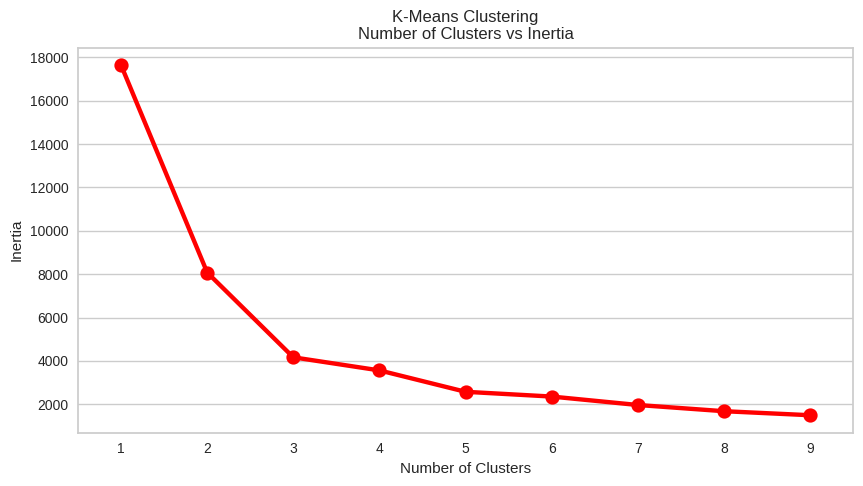

In [121]:
plt.figure(figsize=(10,5))
ax = sns.pointplot(x=list(range(1, 10)), y=inertia, color='red')
ax.set_title('K-Means Clustering\nNumber of Clusters vs Inertia')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

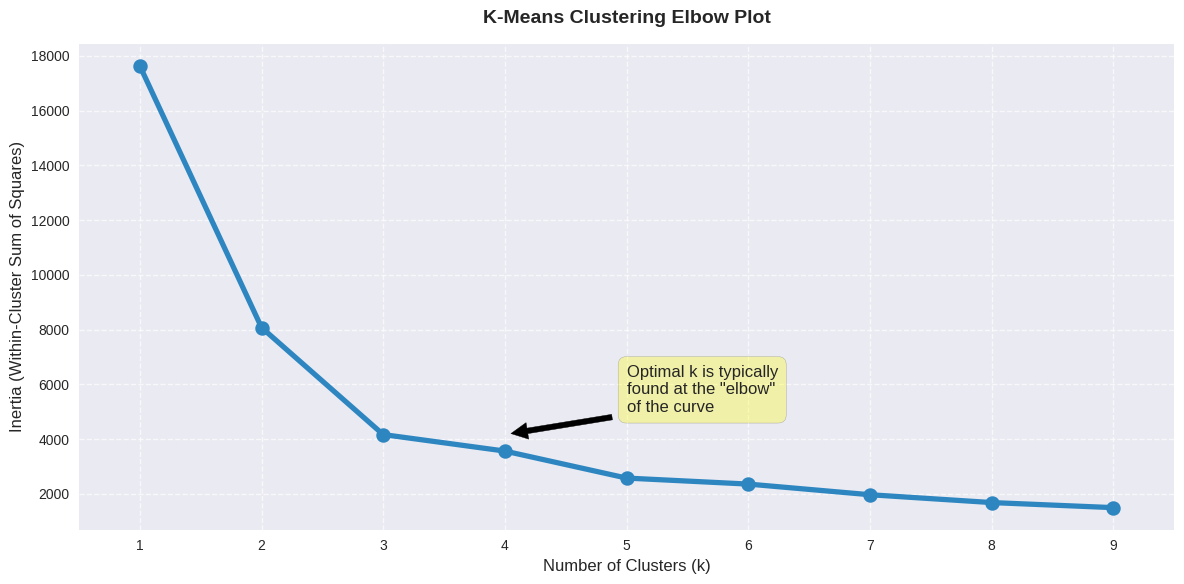

In [122]:
kl = KneeLocator(range(1,10), inertia, curve='convex', direction="decreasing") # setting KneeLocator
kl.elbow

3

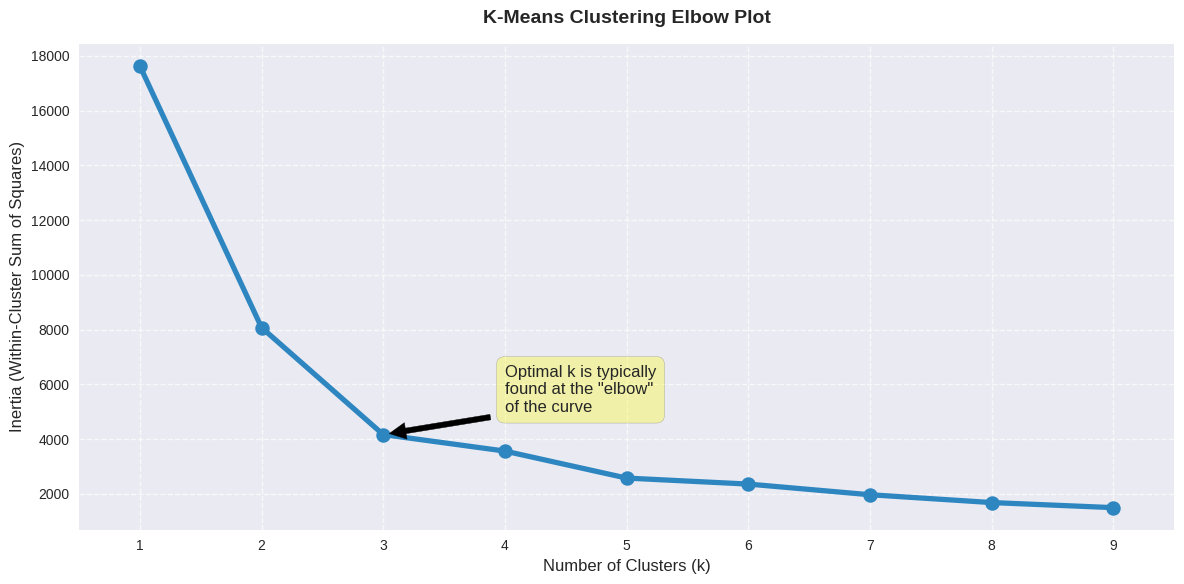

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')

# Create the figure with a pleasant aspect ratio
plt.figure(figsize=(12, 6))

# Create the plot with enhanced styling
sns.pointplot(
    x=list(range(1, 10)),
    y=inertia,
    color='#2E86C1',  # Professional blue color
    markers='o',
    scale=1.2
)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the plot
plt.title('K-Means Clustering Elbow Plot',
         fontsize=14,
         pad=15,
         fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)

# Add annotations to explain the elbow method
plt.annotate('Optimal k is typically\nfound at the "elbow"\nof the curve',
             xy=(2, inertia[2]),
             xytext=(3, inertia[2]*1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5',
                      fc='yellow',
                      alpha=0.3))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

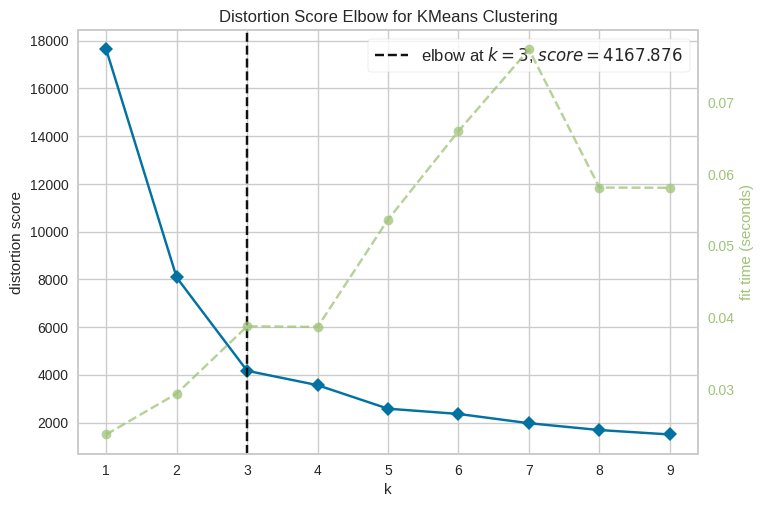

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [123]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(n_clusters=k, max_iter=300, random_state=42), k=(1,10), timings= True)
visualizer.fit(scaled_features)
visualizer.show()

From the above result we can see that K=3 is optimal

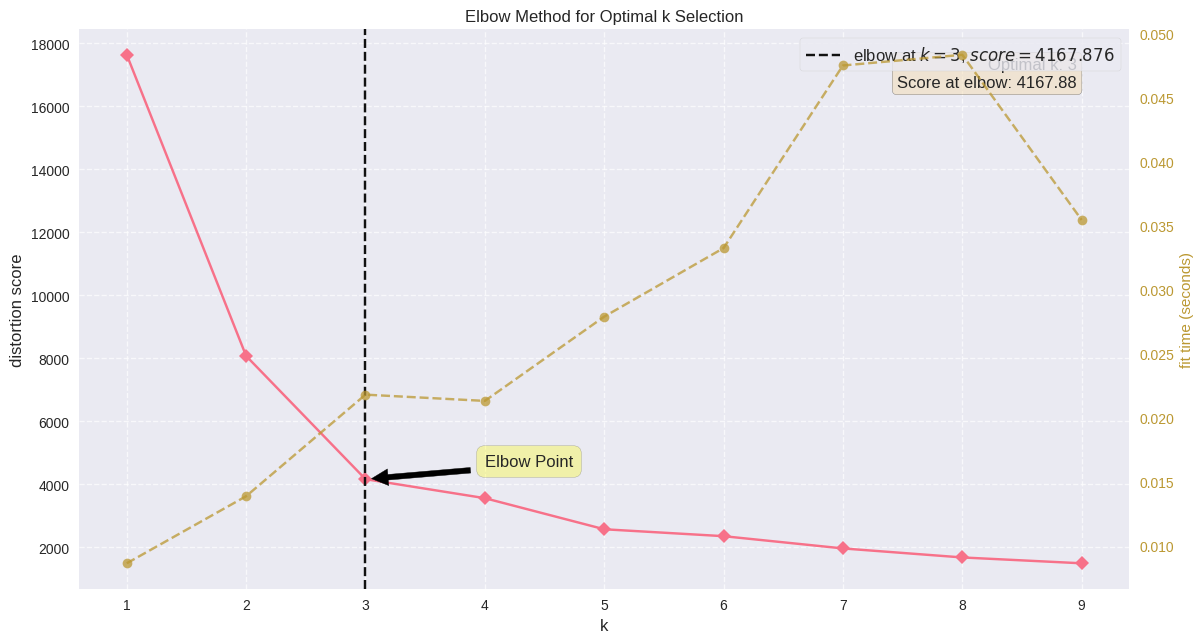

<Axes: title={'center': 'Elbow Method for Optimal k Selection'}, xlabel='k', ylabel='distortion score'>

In [139]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with larger size
plt.figure(figsize=(12, 7))

# Create the visualizer with enhanced parameters
visualizer = KElbowVisualizer(
    estimator=KMeans(
        max_iter=300,
        random_state=42,
        n_init='auto'  # More efficient initialization
    ),
    k=(1, 10),
    timings=True,
    locate_elbow=True,  # Automatically locate elbow point
    title='Elbow Method for Optimal k Selection',
    timing_labels=True  # Show computation time
)

# Fit the visualizer
visualizer.fit(scaled_features)

# Customize the plot
visualizer.ax.grid(True, linestyle='--', alpha=0.7)
visualizer.ax.set_xlabel('Number of Clusters (k)', fontsize=12)
visualizer.ax.set_ylabel('Distortion Score', fontsize=12)

# Add a text box with key metrics
elbow_value = visualizer.elbow_value_
elbow_score = visualizer.elbow_score_
txt = f'Optimal k: {elbow_value}\nScore at elbow: {elbow_score:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
visualizer.ax.text(0.95, 0.95, txt, transform=visualizer.ax.transAxes,
                  verticalalignment='top', horizontalalignment='right',
                  bbox=props)

# Enhance the title
visualizer.ax.set_title('Elbow Method for Optimal k Selection\nwith Computation Time Analysis',
                       pad=20, fontsize=14, fontweight='bold')

# Add annotation for the elbow point
if elbow_value:
    visualizer.ax.annotate('Elbow Point',
                          xy=(elbow_value, elbow_score),
                          xytext=(elbow_value + 1, elbow_score * 1.1),
                          arrowprops=dict(facecolor='black', shrink=0.05),
                          bbox=dict(boxstyle='round,pad=0.5',
                                  fc='yellow',
                                  alpha=0.3))

# Adjust layout
plt.tight_layout()

# Show the plot
visualizer.show()

In [124]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)
clus_label = kmeans.fit_predict(scaled_features)

In [125]:
clus_label

array([1, 1, 2, ..., 0, 0, 1], dtype=int32)

In [126]:
labels = pd.DataFrame(clus_label, index=clus_rfm.index, columns=['labels'])
labels.head()


labels
Customer ID        
12346.0           1
12347.0           1
12348.0           2
12349.0           1
12350.0           0

In [127]:
clus_rfm = clus_rfm.join(labels)
clus_rfm

recency  frequency  monetary  labels
Customer ID                                      
12346.0          326         12  77556.46       1
12347.0            2          8   5633.32       1
12348.0           75          5   2019.40       2
12349.0           19          4   4428.69       1
12350.0          310          1    334.40       0
...              ...        ...       ...     ...
18283.0            4         22   2736.65       1
18284.0          432          1    461.68       0
18285.0          661          1    427.00       0
18286.0          477          2   1296.43       0
18287.0           43          7   4182.99       1

[5878 rows x 4 columns]

In [128]:
clus_rfm['labels'].value_counts(normalize=True)


labels
2    0.467676
0    0.321878
1    0.210446
Name: proportion, dtype: float64

In [129]:
clus_mean = clus_rfm.groupby('labels').mean()
clus_mean

recency  frequency      monetary
labels                                     
0       470.912262   1.925476    627.997025
1        51.160065  19.049313  11060.306791
2        83.367770   3.551109   1045.347146

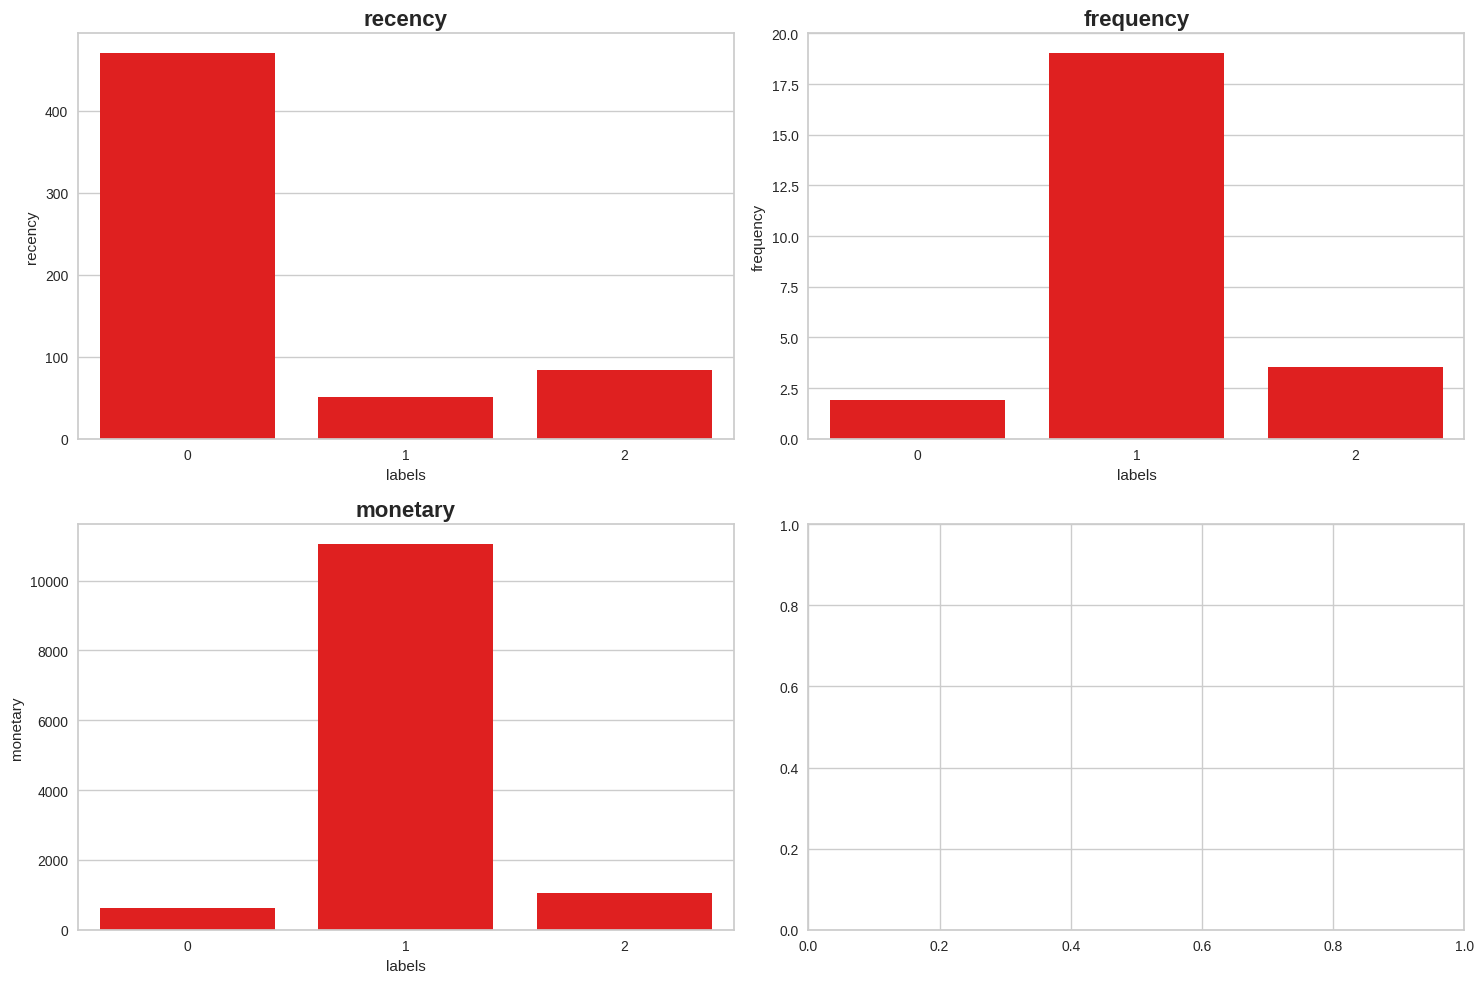

In [130]:
fig= plt.subplots(nrows=2 , ncols=2 , figsize=(15,10))
for i, col in enumerate(clus_mean.columns):
    plt.subplot(2,2,i+1)
    ax=  sns.barplot(x=clus_mean.index, y=clus_mean[col], data=clus_mean, color='red' )
    plt.title(col, fontweight='bold', fontsize=16)
plt.tight_layout()

### Customer Segmentation Analysis:

Based on the RFM (Recency, Frequency, Monetary) analysis, we can categorize our customers into three distinct segments:

**High-Value Customers (Cluster 2)**
This group demonstrates exceptional engagement across all metrics:
- Very recent purchases
- Very high purchase frequency
- Very high monetary value

**Mid-Value Customers (Cluster 0)**
These customers show moderate engagement:
- Good recency of purchases
- Medium purchase frequency
- Medium monetary value

**Low-Value Customers (Cluster 1)**
This segment exhibits the least favorable metrics:
- Poor recency (long time since last purchase)
- Low purchase frequency
- Low monetary value

This segmentation provides clear insights into customer behavior and value, allowing for targeted marketing strategies and personalized approaches to each group. The high-value customers in Cluster 2 represent the most profitable segment and should be prioritized for retention efforts. Cluster 0 customers show potential for growth and may benefit from strategies to increase their engagement. Cluster 1 customers may require reactivation campaigns or reassessment of their needs to improve their value to the business.